In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from geopy.distance import geodesic
import folium as folium

In [26]:
df = pd.read_csv('/content/drive/MyDrive/TugasPurwa/Capstone 2/Airbnb Listings Bangkok.csv')

## 1. Initial Data Exploration

In [27]:
df.head(5)

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

The dataset contains information about various rental listings in Bangkok, including details such as the listing ID, name, host information, neighborhood, geographical coordinates, room type, price, minimum nights required, number of reviews, last review date, reviews per month, host listings count, availability, and recent reviews.

In [28]:
df.shape

(15854, 17)

The DataFrame has a shape of (15854, 17), indicating that it contains 15,854 rows and 17 columns, representing a substantial dataset with multiple attributes for analysis.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

**Specific Checks for every column:**



1.   `price`: Ensure there are no negative values.
2.   `latitude and longitude`: Ensure they fall within valid ranges (-90 to 90 for latitude, -180 to 180 for longitude).
3.    `last_review`: Ensure this column contains valid date strings if it's supposed to be a date.
4.    `reviews_per_month`: Ensure there are no negative values and that missing values are handled correctly.
5.     `minimum_nights`: Ensure there are no negative values.
6.     `number_of_reviews` and `number_of_reviews_ltm`: Ensure there are no negative values.







In [30]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

There are no duplicated rows

In [31]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

This dataframe includes various data types including integers, floats, and objects. Notably, some columns, contain missing values, indicating potential areas for data cleaning or further analysis :

- Column `name`: 15,846 non-null entries (8 missing values)
- Column `host_name`: 15,853 non-null entries (1 missing value)
- Column `last_review`: 10,064 non-null entries (5,790 missing values)
- Column `reviews_per_month`: 10,064 non-null entries (5,790 missing values)

To verify the presence of missing values in the columns, I will utilize the df.isna function in the subsequent cell.

## 2. Data Wrangling

### a. Removing Unneccesary Column

In [32]:
df.head(1)

Unnamed: 0     id                             name  host_id host_name  \
0           0  27934  Nice room with superb city view   120437    Nuttee   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0

We dont need `Unnamed : 0` because it's the same as the df index

In [85]:
df = df[df.drop(columns='Unnamed: 0', inplace=True)]

KeyError: None

In [34]:
df.head(1)

Unnamed: 0     id                             name  host_id host_name  \
0           0  27934  Nice room with superb city view   120437    Nuttee   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0

###b. Changing the Data Type & Checking for Invalid Numbers

#### Column `Price`

In [35]:
negative_prices = df[df['price'] <= 0]
if not negative_prices.empty:
    print("Negative or 0 values found in 'price':")
    negative_prices
else:
    print("No negative values or 0 found in 'price'.")

Negative or 0 values found in 'price':


In [36]:
negative_prices

Unnamed: 0        id                           name    host_id  \
11103       11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

In [37]:
df = df[df['price'] > 0]

#### Column `Lat` & `Long`

In [38]:
invalid_latitude = df[(df['latitude'] < -90) | (df['latitude'] > 90)]
invalid_longitude = df[(df['longitude'] < -180) | (df['longitude'] > 180)]

if not invalid_latitude.empty:
    print("Invalid latitude values found:")
    print(invalid_latitude)
else:
    print("No invalid latitude values found.")

if not invalid_longitude.empty:
    print("Invalid longitude values found:")
    print(invalid_longitude)
else:
    print("No invalid longitude values found.")

No invalid latitude values found.
No invalid longitude values found.


Column `Last_Review`

In [39]:
df['last_review'] = pd.to_datetime(df['last_review'])

<ipython-input-39-0c755d367a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'])


In [40]:
try:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='raise')
    print("'last_review' contains valid date strings.")
except ValueError as e:
    print(f"Invalid date strings found in 'last_review': {e}")

'last_review' contains valid date strings.


<ipython-input-40-32e390be38e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'], errors='raise')


#### Column `Reviews_per_Month`

In [41]:
negative_reviews = df[df['reviews_per_month'] < 0]

if not negative_reviews.empty:
    print("Negative values found in 'reviews_per_month':")
    print(negative_reviews)
else:
    print("No negative values found in 'reviews_per_month'.")


No negative values found in 'reviews_per_month'.


#### Column `Minimum_Nights`

In [42]:
negative_min_nights = df[df['minimum_nights'] < 0]
if not negative_min_nights.empty:
    print("Negative values found in 'minimum_nights':")
    print(negative_min_nights)
else:
    print("No negative values found in 'minimum_nights'.")

No negative values found in 'minimum_nights'.


#### Column `number_of_reviews` and `number_of_reviews_ltm`

In [43]:
negative_num_reviews = df[df['number_of_reviews'] < 0]
negative_num_reviews_ltm = df[df['number_of_reviews_ltm'] < 0]

if not negative_num_reviews.empty:
    print("Negative values found in 'number_of_reviews':")
    print(negative_num_reviews)
else:
    print("No negative values found in 'number_of_reviews'.")

if not negative_num_reviews_ltm.empty:
    print("Negative values found in 'number_of_reviews_ltm':")
    print(negative_num_reviews_ltm)
else:
    print("No negative values found in 'number_of_reviews_ltm'.")

No negative values found in 'number_of_reviews'.
No negative values found in 'number_of_reviews_ltm'.


### c. Handling Missing Value

In [44]:
df_null = df[['name', 'host_name', 'last_review', 'reviews_per_month']]

In [45]:
percent_missing = df_null.isnull().sum() * 100 / len(df)
print(percent_missing)

name                  0.050464
host_name             0.006308
last_review          36.516748
reviews_per_month    36.516748
dtype: float64


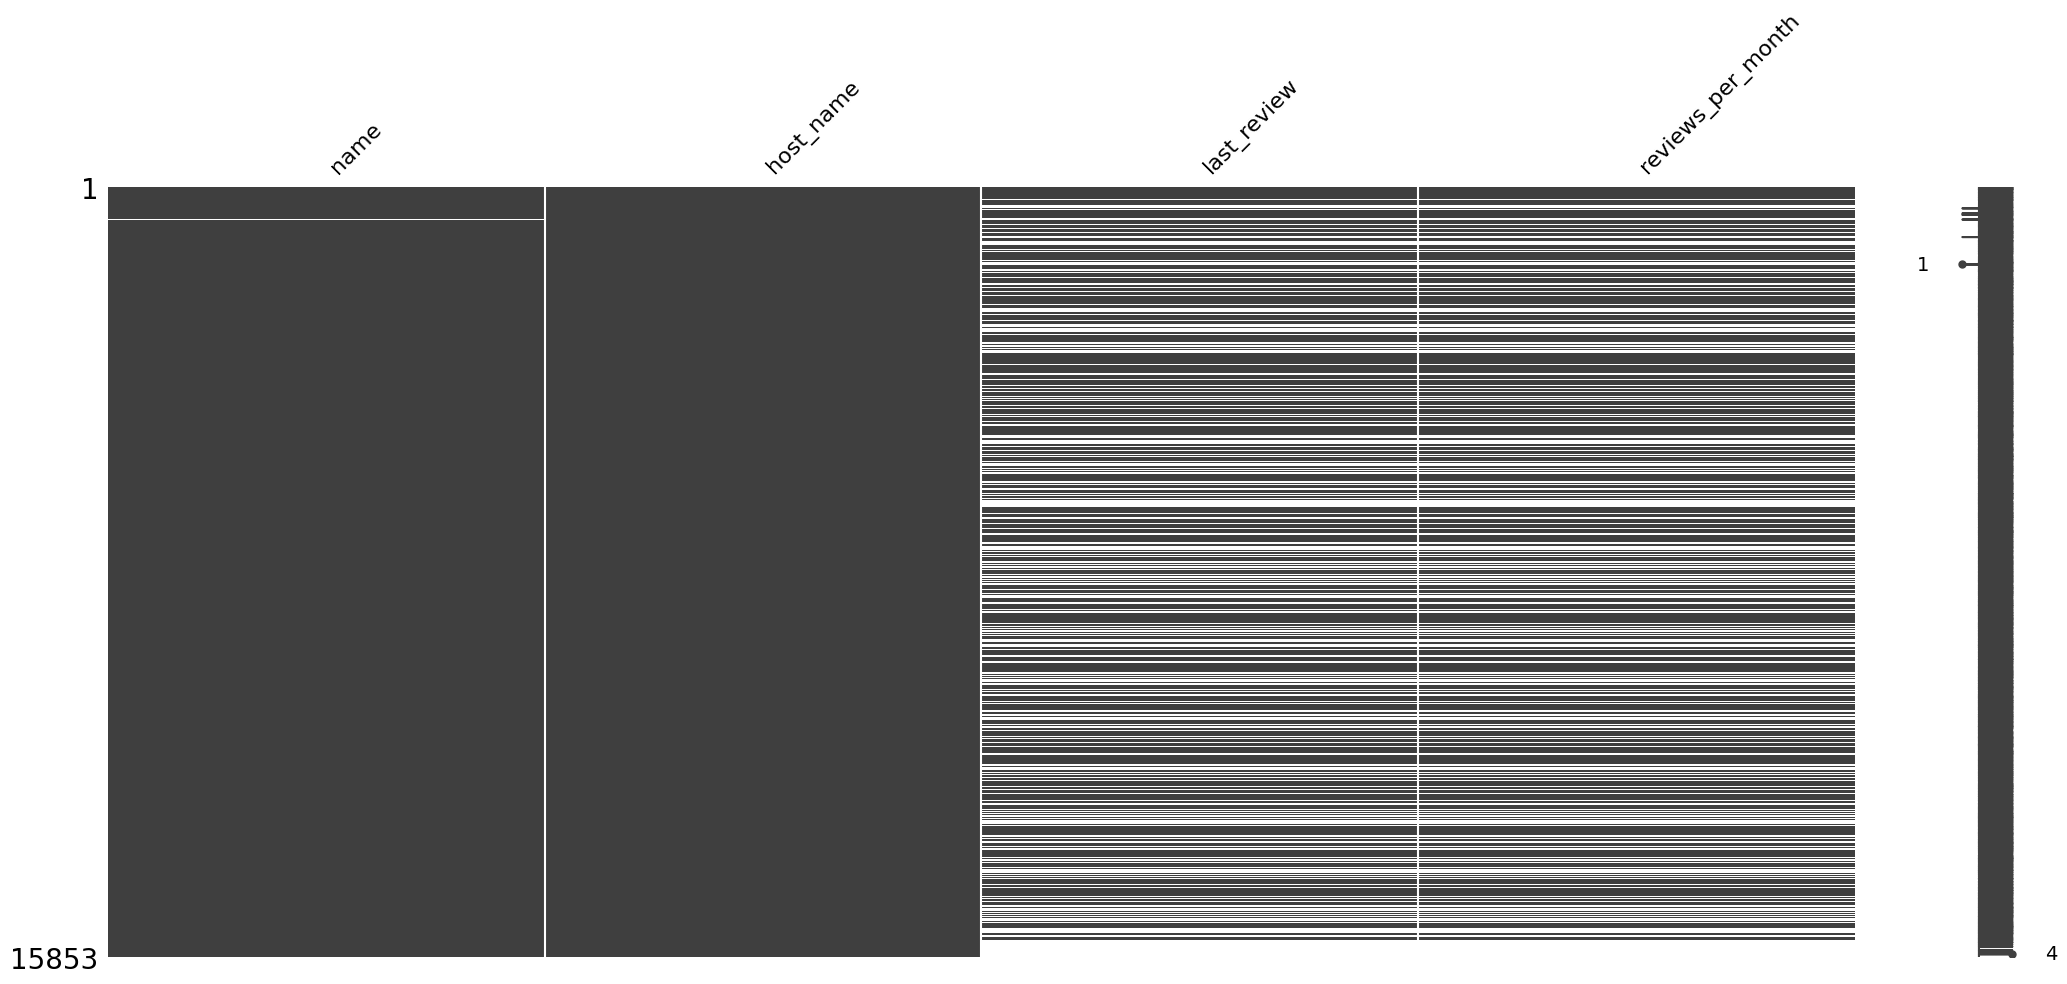

<Figure size 1200x600 with 0 Axes>

In [46]:
msno.matrix(df_null)
plt.figure(figsize=(12, 6))
plt.show()

#### a. Column `Name`

In [47]:
df_name = df[df['name'].isnull()]
df_name

Unnamed: 0        id name   host_id        host_name neighbourhood  \
439          439   4549768  NaN  18852579          Titawan  Phra Khanong   
544          544   4720818  NaN  24386225           Cherry     Din Daeng   
572          572   4245018  NaN  22030043        Parichart    Bang Phlat   
669          669   6148415  NaN  31895202            Chira       Bang Na   
1030        1030   8055144  NaN  42521288          Nantida       Vadhana   
1282        1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi   
1594        1594  10710165  NaN  55347997      Khaneungnit       Vadhana   
2075        2075  13142743  NaN  73275200         Pakaphol   Khlong Toei   

      latitude  longitude        room_type  price  minimum_nights  \
439   13.69406  100.59619     Private room   1080               5   
544   13.77562  100.57346     Private room   1200               1   
572   13.78376  100.49821     Private room   1200               1   
669   13.68276  100.60894  Entire home/apt   2424               2   
1030  13.74126  100.55761     Private room   5000               3   
1282  13.75328  100.52928     Private room    930               1   
1594  13.71757  100.60464     Private room   1000               1   
2075  13.72566  100.56416     Private room    850               1   

      number_of_reviews last_review  reviews_per_month  \
439                   0         NaT                NaN   
544                   0         NaT                NaN   
572                   0         NaT                NaN   
669                   0         NaT                NaN   
1030                  0         NaT                NaN   
1282                  6  2017-05-13               0.07   
1594                  0         NaT                NaN   
2075                  2  2017-12-11               0.03   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
439                                1               365                      0  
544                                1               365                      0  
572                                1               365                      0  
669                                1               365                      0  
1030                               1               365                      0  
1282                               1               365                      0  
1594                               1               365                      0  
2075                               3               220                      0

From this dataframe we know that when listing the property in Airbnb, we don't neccesarily need to input listings name. So i've decided to input the missing value with `host_name` + `room_type` + 'Homestay'



In [48]:
# Fill missing 'name' values with a combination of 'host_name', 'room_type', and 'Homestay'
df['name'] = df['name'].fillna(df['host_name'] + ' ' + df['room_type'] + ' Homestay')

#### b. Column `Host_Name`

In [49]:
df_host_name = df[df['host_name'].isnull()]
df_host_name

Unnamed: 0        id           name    host_id host_name neighbourhood  \
3571        3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi   

      latitude  longitude     room_type  price  minimum_nights  \
3571  13.76999  100.63769  Private room   1399               3   

      number_of_reviews last_review  reviews_per_month  \
3571                  1  2017-07-29               0.02   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
3571                               1               365                      0

In [50]:
df['host_name'] = df['host_name'].fillna('Unknown')

#### Column `Last_Review`

In [51]:
df_last_review = df[df['last_review'].isnull()]
df_last_review

Unnamed: 0                  id  \
1               1               27979   
2               2               28745   
4               4              941865   
7               7             1738669   
14             14              959254   
...           ...                 ...   
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                    name    host_id  \
1                         Easy going landlord,easy place     120541   
2                      modern-style apartment in Bangkok     123784   
4                             Suite Room 3 at MetroPoint     610315   
7                        1 chic bedroom apartment in BKK    7045870   
14                    Deluxe Condo, Nana, Pool/GYM/Sauna    5153476   
...                                                  ...        ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

        host_name neighbourhood   latitude   longitude        room_type  \
1             Emy       Bang Na  13.668180  100.616740     Private room   
2      Familyroom     Bang Kapi  13.752320  100.624020     Private room   
4           Kasem     Bang Kapi  13.768720  100.633380     Private room   
7        Jiraporn    Chatu Chak  13.829250  100.567370  Entire home/apt   
14         Natcha   Khlong Toei  13.715160  100.568060  Entire home/apt   
...           ...           ...        ...         ...              ...   
15849       Renee       Pra Wet  13.715132  100.653458     Private room   
15850   Phakhamon   Ratchathewi  13.753052  100.538738     Private room   
15851   Phakhamon   Ratchathewi  13.753169  100.538700     Private room   
15852   Phakhamon   Ratchathewi  13.754789  100.538757     Private room   
15853   Phakhamon   Ratchathewi  13.752960  100.540820     Private room   

       price  minimum_nights  number_of_reviews last_review  \
1       1316               1                  0         NaT   
2        800              60                  0         NaT   
4       1905               1                  0         NaT   
7       1461               1                  0         NaT   
14      1400              30                  0         NaT   
...      ...             ...                ...         ...   
15849   2298              28                  0         NaT   
15850   1429               1                  0         NaT   
15851   1214               1                  0         NaT   
15852   1214               1                  0         NaT   
15853   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2   

In [52]:
def last_review_fillna(row):
    if pd.isna(row['last_review']):
        if row['number_of_reviews'] == 0:
            return '0'

In [53]:
df['last_review'] = df['last_review'].fillna(df.apply(last_review_fillna, axis=1))

In [54]:
df['last_review'].isnull().sum()

np.int64(0)

#### Column `Reviews_per_Month`

In [55]:
df_reviews_per_month = df[df['reviews_per_month'].isnull()]
df_reviews_per_month

Unnamed: 0                  id  \
1               1               27979   
2               2               28745   
4               4              941865   
7               7             1738669   
14             14              959254   
...           ...                 ...   
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                    name    host_id  \
1                         Easy going landlord,easy place     120541   
2                      modern-style apartment in Bangkok     123784   
4                             Suite Room 3 at MetroPoint     610315   
7                        1 chic bedroom apartment in BKK    7045870   
14                    Deluxe Condo, Nana, Pool/GYM/Sauna    5153476   
...                                                  ...        ...   
15849      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...  491526222   
15851  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

        host_name neighbourhood   latitude   longitude        room_type  \
1             Emy       Bang Na  13.668180  100.616740     Private room   
2      Familyroom     Bang Kapi  13.752320  100.624020     Private room   
4           Kasem     Bang Kapi  13.768720  100.633380     Private room   
7        Jiraporn    Chatu Chak  13.829250  100.567370  Entire home/apt   
14         Natcha   Khlong Toei  13.715160  100.568060  Entire home/apt   
...           ...           ...        ...         ...              ...   
15849       Renee       Pra Wet  13.715132  100.653458     Private room   
15850   Phakhamon   Ratchathewi  13.753052  100.538738     Private room   
15851   Phakhamon   Ratchathewi  13.753169  100.538700     Private room   
15852   Phakhamon   Ratchathewi  13.754789  100.538757     Private room   
15853   Phakhamon   Ratchathewi  13.752960  100.540820     Private room   

       price  minimum_nights  number_of_reviews last_review  \
1       1316               1                  0           0   
2        800              60                  0           0   
4       1905               1                  0           0   
7       1461               1                  0           0   
14      1400              30                  0           0   
...      ...             ...                ...         ...   
15849   2298              28                  0           0   
15850   1429               1                  0           0   
15851   1214               1                  0           0   
15852   1214               1                  0           0   
15853   1214               1                  0           0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2   

In [56]:
def reviews_per_month_fillna(row):
    if pd.isna(row['reviews_per_month']):
        if row['number_of_reviews'] == 0:
            return 0

In [57]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df.apply(reviews_per_month_fillna, axis=1))

In [58]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

## 3. Statistics & Anomalies / Outlier

In [59]:
df.describe()

Unnamed: 0            id       host_id      latitude     longitude  \
count  15853.000000  1.585300e+04  1.585300e+04  15853.000000  15853.000000   
mean    7926.299628  1.579496e+17  1.540928e+08     13.745144    100.559903   
std     4576.874737  2.946082e+17  1.318666e+08      0.043041      0.050912   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.000000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.000000  3.503224e+07  1.224556e+08     13.738490    100.561410   
75%    11890.000000  5.256284e+07  2.390274e+08     13.759500    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585300e+04    15853.000000       15853.000000       15853.000000   
mean   3.217907e+03       15.293257          16.655207           0.516211   
std    2.497290e+04       50.816496          40.614397           0.952774   
min    2.780000e+02        1.000000           0.000000           0.000000   
25%    9.000000e+02        1.000000           0.000000           0.000000   
50%    1.429000e+03        1.000000           2.000000           0.090000   
75%    2.429000e+03        7.000000          13.000000           0.670000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15853.000000      15853.000000           15853.000000  
mean                        13.890431        244.394058               3.481738  
std                         30.270630        125.832224               8.917176  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

**Anomalies Found :**

| Column              | Potential Anomalies                                                                                     | Action                                          |
|---------------------|--------------------------------------------------------------------------------------------------------|------------------------------------------------|
| Price               | ฿1,000,000 (extreme outlier), negative values, or unrealistic precision (e.g., ฿278.00)                | Filter/remove, check for typos.                |
| Minimum Nights      | 1,125 nights (long-term rental misclassified?)                                                         | Cap at 365 days or reclassify as long-term rentals. |
| Number of Reviews    | 10,000+ reviews (implausible for short-term rentals)                                                  | Investigate for fake reviews or data entry errors. |


#### a. Column `Price`

In [60]:
df_price = df[df['price'] >= 1000000]
df_price

Unnamed: 0                  id  \
1239         1239             8880974   
1779         1779            11579635   
4620         4620            23740993   
6289         6289            29909847   
9345         9345            39858231   
12300       12300  562972065309061724   
12868       12868  635676064543597376   

                                                    name    host_id host_name  \
1239                  Modern,wifi,5m MRT&2 Shopping Mall   30803267   Yasmine   
1779                  2 Bedroom,wifi,5mMRT&Shopping Mall   30803267   Yasmine   
4620        Modern&Luxury apartment,5min to MRT,freeWifi   30803267   Yasmine   
6289        BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR  210559448      Cora   
9345                 1BR cozy condo  close to ONNUT BTS.  210559448      Cora   
12300  3B中文No Guest Service Fee@Nana Asok/Soi11 Night...  131427125        Jj   
12868              New 1 bedroom apartment BTS MRT Asoke   12464705     Lucio   

      neighbourhood   latitude   longitude        room_type    price  \
1239    Huai Khwang  13.759950  100.569360  Entire home/apt  1000000   
1779    Huai Khwang  13.754710  100.565980  Entire home/apt  1000000   
4620    Huai Khwang  13.760650  100.568980  Entire home/apt  1000000   
6289    Khlong Toei  13.703330  100.592470  Entire home/apt  1000000   
9345    Khlong Toei  13.704960  100.591510  Entire home/apt  1000000   
12300       Vadhana  13.746660  100.559100  Entire home/apt  1014758   
12868       Vadhana  13.742186  100.560394  Entire home/apt  1100000   

       minimum_nights  number_of_reviews          last_review  \
1239              100                 45  2016-09-05 00:00:00   
1779              100                 53  2018-02-20 00:00:00   
4620                1                 12  2020-03-24 00:00:00   
6289                2                 69  2020-03-12 00:00:00   
9345               25                  2  2020-02-23 00:00:00   
12300              30                  2  2022-09-17 00:00:00   
12868              14                  0                    0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1239                0.51                               4               180   
1779                0.64                               4               249   
4620                0.22                               4               336   
6289                1.39                               6                90   
9345                0.05                               6                88   
12300               0.32                              10                75   
12868               0.00                               1               365   

       number_of_reviews_ltm  
1239                       0  
1779                       0  
4620                       0  
6289                       0  
9345                       0  
12300                      2  
12868                      0

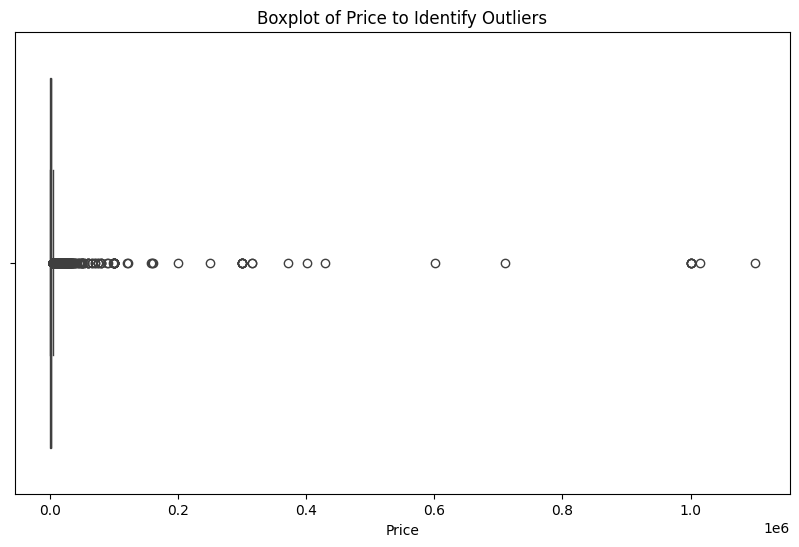

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price to Identify Outliers')
plt.xlabel('Price')
plt.show()

In [62]:
from scipy import stats
df['price_zscore'] = np.abs(stats.zscore(df['price']))
outliers = df[(df['price_zscore'] > 3) | (df['price_zscore'] < -3)]
outliers


Unnamed: 0                  id  \
17             17               66046   
393           393             4450156   
1239         1239             8880974   
1779         1779            11579635   
1850         1850            12056763   
1986         1986            13033135   
2507         2507            15380964   
2527         2527            15742265   
2568         2568            16045517   
2668         2668            16139502   
4194         4194            22059876   
4373         4373            22633450   
4620         4620            23740993   
4622         4622            23744398   
5086         5086            25429707   
5092         5092            25434238   
5093         5093            25434663   
6083         6083            29526819   
6289         6289            29909847   
6298         6298            30555811   
6397         6397            30476846   
6547         6547            31365499   
6549         6549            31365769   
6578         6578            31064616   
6708         6708            31270009   
6760         6760            31364368   
7196         7196            32729697   
8371         8371            36762091   
8438         8438            36820954   
8945         8945            38863681   
9345         9345            39858231   
9461         9461            39970606   
10737       10737            42979734   
10738       10738            42979810   
11199       11199            44690320   
11691       11691            49957878   
11885       11885            52940323   
11974       11974            52503428   
12300       12300  562972065309061724   
12634       12634  597430700332581904   
12792       12792  629653142142561774   
12868       12868  635676064543597376   
13300       13300  661357146049226172   
15200       15200  766201549677186657   
15548       15548  781476920559679605   

                                                    name    host_id  \
17                      24Flr- 1br Apt near JJ, MRT, BTS     323158   
393                    Stylish Apartment in Bangkok, MRT   23095883   
1239                  Modern,wifi,5m MRT&2 Shopping Mall   30803267   
1779                  2 Bedroom,wifi,5mMRT&Shopping Mall   30803267   
1850                 Charoenkrung Road House/Office Rent   62898498   
1986                     Airport-MRT-ShowShopFood-FullFN   34158729   
2507   Resort Style Luxury apartment,5min to MRT,free...   30803267   
2527           Quiet Canal Oasis Apartment very near BTS   65103949   
2568                BTS Wongwianyai, Rooftop  Pool, Wifi   94426146   
2668            Nice Check-in My Hostel (Private 2 beds)   51074483   
4194                                                   C  160989331   
4373                                 rm 1 : cozy & comfy  117057915   
4620        Modern&Luxury apartment,5min to MRT,freeWifi   30803267   
4622   Cozy 1bed, BTS Prakanon Sukumvit71 Netflix&kit...   91426608   
5086           Clean Check-in My Hostel (Private 4 beds)   51074483   
5092    Comfy Check-in My Hostel (Private 2 beds-deluxe)   51074483   
5093           Comfy Check-in My Hostel (Private 3 beds)   51074483   
6083         Modern Deluxe Private Double Bed (2 adults)   51074483   
6289        BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR  210559448   
6298   Spacious&comfort room 3bed4pak3min to bts thon...  229254852   
6397                         BTS ONNUT one bedroom for 3  210559448   
6547   WH (Container style, twin bed, 2ppl, citycente...  234881965   
6549                 WH (container, Double bed, 2ppl -F)  234881965   
6578   【ExLN:9min to BTS/MRT&Terminal21,Big Balcony,Q...   20904996   
6708     Summer of'19, BTS Onnut station , brand new 1BR  210559448   
6760   WH (Container style, twin bed, 2ppl, citycente...  234881965   
7196   BTS Sukhumvit Onnut 站  全新一房一厅One new condo one BR  210559448   
8371          Cozy Place  resort style on Sukhumvit Line  267181587   
8438   LUXURY PH 5 BR Ploenchit FREE PRIVATE VAN SERVICE  275

I have decided to remove the price because it doesn't make sense 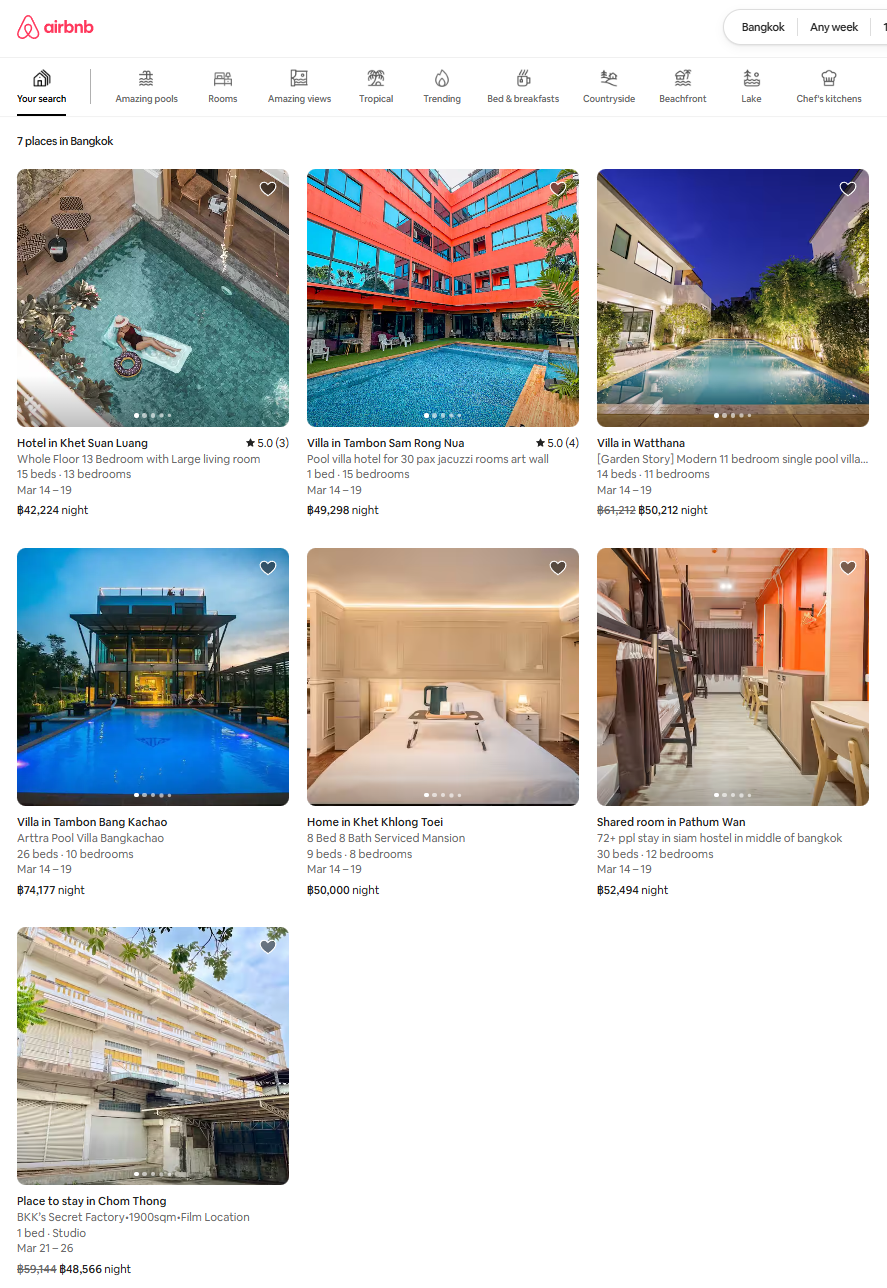



In [63]:
df = df[df['price_zscore'] <= 3]

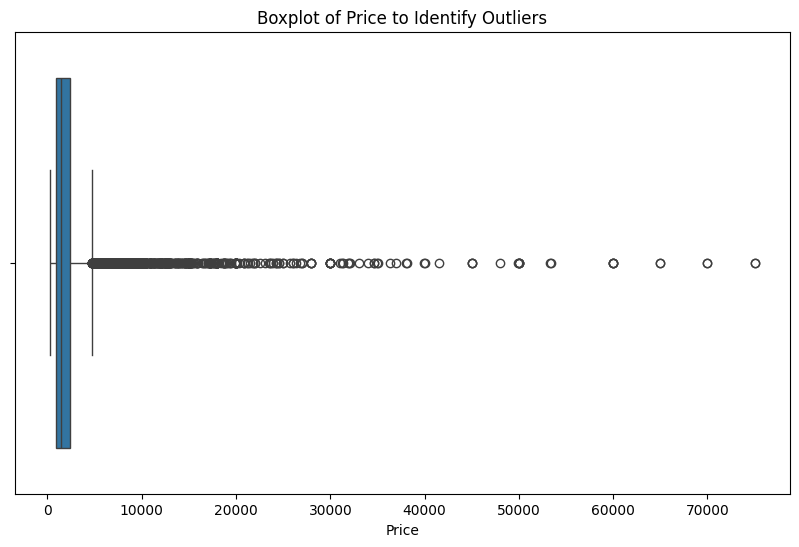

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price to Identify Outliers')
plt.xlabel('Price')
plt.show()

#### b. Column `Minimum_Nights`

In [65]:
from scipy import stats
df['nights_zscore'] = np.abs(stats.zscore(df['minimum_nights']))
outliers = df[(df['nights_zscore'] > 3) | (df['nights_zscore'] < -3)]
outliers.sort_values(by='minimum_nights', ascending=False).head(10)


Unnamed: 0        id  \
61             61   1041976   
7986         7986  35165443   
11524       11524  49032568   
10153       10153  41623113   
11243       11243  45051929   
10644       10644  42685153   
1200         1200   8801560   
1592         1592  10709131   
1833         1833  12046101   
3694         3694  19893829   

                                                    name    host_id  \
61     Long-stay special rate spacious entire floor Siam    5735895   
7986         Wonderful apartment for you holiday in Thai   86991723   
11524         Freehold  Condo near Bangsue Grand Station    4661237   
10153  blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...  162537040   
11243   Bellevue Boutique Bangkok | Airport Link HUA-MAK  165329146   
10644               The Prime Sukhumvit 11 - Room 29/150  337709866   
1200                  30th floor, 10 min to BTS, Seaview    4517723   
1592                 34Fl 2, M Ladprao Condo,MRT & Malls   32398198   
1833                    Near BTS Onnut Convenience house   22676472   
3694                  2 Bedroom Suite@Kirthana Residence   64131143   

       host_name neighbourhood  latitude  longitude        room_type  price  \
61        Pariya   Parthum Wan  13.74814  100.52016  Entire home/apt   2900   
7986        Yang       Bang Na  13.67260  100.60352  Entire home/apt   2000   
11524   Chayanid      Bang Sue  13.80697  100.52362  Entire home/apt    554   
10153    Songnya        Sathon  13.71195  100.52055  Entire home/apt    650   
11243   Sataporn     Suanluang  13.73633  100.63836     Private room   1314   
10644     Vatiaz       Vadhana  13.74426  100.55758     Private room  15143   
1200    Kannicha       Bang Na  13.66417  100.64955  Entire home/apt  35000   
1592   Touchapon    Chatu Chak  13.81699  100.56292  Entire home/apt    760   
1833        Kuan     Suanluang  13.71161  100.60344  Entire home/apt   1300   
3694      Chetna       Vadhana  13.73917  100.56616  Entire home/apt   7286   

       minimum_nights  number_of_reviews          last_review  \
61               1125                295  2021-08-21 00:00:00   
7986             1115                  0                    0   
11524            1095                  0                    0   
10153            1000                  2  2020-03-08 00:00:00   
11243             999                  0                    0   
10644             999                  0                    0   
1200              998                 20  2022-10-30 00:00:00   
1592              700                 61  2019-08-25 00:00:00   
1833              500                  2  2016-07-30 00:00:00   
3694              500                  0                    0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
61                  2.61                               3                 0   
7986                0.00                               2               358   
11524               0.00                               1               358   
10153               0.06                              13               179   
11243               0.00                               2               181   
10644               0.00                               1                89   
1200                0.26                               7               365   
1592                0.73                               2               364   
1833                0.02                               3               363   
3694                0.00                               3                48   

       number_of_reviews_ltm  price_zscore  nights_zscore  
61                         0      0.012730      21.946256  
7986                       0      0.048771      21.748502  
11524                      0      0.106675      21.352995  
10153                      0      0.102831      19.474336  
11243                      0      0.076241      19.454560  
10644                      0      0.477536      19.454560  
1200              

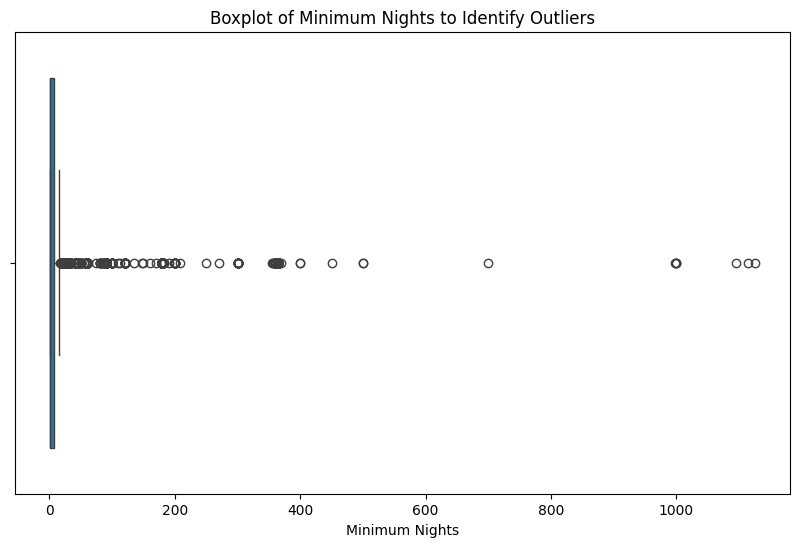

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights to Identify Outliers')
plt.xlabel('Minimum Nights')
plt.show()

#### c. Column `Number_Of_Review`

In [67]:
from scipy import stats
df['reviews_zscore'] = np.abs(stats.zscore(df['number_of_reviews']))
outliers = df[(df['reviews_zscore'] > 3) | (df['reviews_zscore'] < -3)]
outliers.sort_values(by='number_of_reviews', ascending=False).head(10)


Unnamed: 0        id                                               name  \
3737        3737  20869092      Beautiful One Bedroom Apartment Near Skytrain   
6586        6586  31077175  FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE   
1470        1470   9453790      37 Nature House: 10 mins to DMK Int'l Airport   
905          905   5964843                    The Mustang Nero/No.4 The Horse   
622          622   6013487                     The Mustang Nero/No.3 The Wolf   
53            53   1026451      ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡   
1673        1673  11753619         near DMK: Don Mueang International Airport   
1462        1462   9849435               The Mustang Nero/No.7 The Zebra Song   
80            80    393066                             ✺✺99 feet in the sky✺✺   
623          623   6033632                   The Mustang Nero/No.2 Black Bird   

        host_id   host_name neighbourhood  latitude  longitude  \
3737  116193397     Suchada    Phaya Thai  13.77369  100.54079   
6586  158545122      Pailin   Lat Krabang  13.72132  100.76495   
1470   35462876   Wuthiphon        Lak Si  13.87145  100.58039   
905    30963587  Themustang   Khlong Toei  13.71143  100.59390   
622    30963587  Themustang   Khlong Toei  13.71286  100.59172   
53      3346331         Bee        Sathon  13.71192  100.51535   
1673   48491149    Auttapon    Don Mueang  13.88852  100.59296   
1462   30963587  Themustang   Khlong Toei  13.71150  100.59397   
80      1927968        Evan        Sathon  13.72062  100.54707   
623    30963587  Themustang   Khlong Toei  13.71136  100.59217   

            room_type  price  minimum_nights  number_of_reviews  \
3737  Entire home/apt   1571               3               1224   
6586     Private room   1032               1                807   
1470  Entire home/apt   1039               1                533   
905        Hotel room   2329               1                486   
622        Hotel room   2329               1                477   
53    Entire home/apt    866               2                472   
1673     Private room    911               1                451   
1462       Hotel room   2329               1                433   
80    Entire home/apt    829               1                430   
623        Hotel room   2000               1                426   

              last_review  reviews_per_month  calculated_host_listings_count  \
3737  2022-12-16 00:00:00              19.13                               1   
6586  2022-12-12 00:00:00              16.62                               3   
1470  2022-12-04 00:00:00               6.22                               9   
905   2022-12-06 00:00:00               5.26                              10   
622   2022-11-22 00:00:00               5.11                              10   
53    2022-12-15 00:00:00               4.02                               7   
1673  2022-12-26 00:00:00               5.70                               5   
1462  2022-12-20 00:00:00               5.06                              10   
80    2022-10-01 00:00:00               3.39                              37   
623   2020-02-07 00:00:00               4.65                              10   

      availability_365  number_of_reviews_ltm  price_zscore  nights_zscore  \
3737               310                    109      0.065950       0.241698   
6586               348                    146      0.087534       0.281248   
1470               346                     18      0.087254       0.281248   
905                 47                      6      0.035596       0.281248   
622                 50                      6      0.035596       0.281248   
53                 320                     29      0.094181       0.261473   
1673               356                      3      0.092379       0.281248   
1462                44                     19      0.035596       0.281248   
80                 334                     10      0.095663       

### Short Summary

In [68]:
df = df.drop(['price_zscore', 'nights_zscore', 'reviews_zscore'], axis=1)


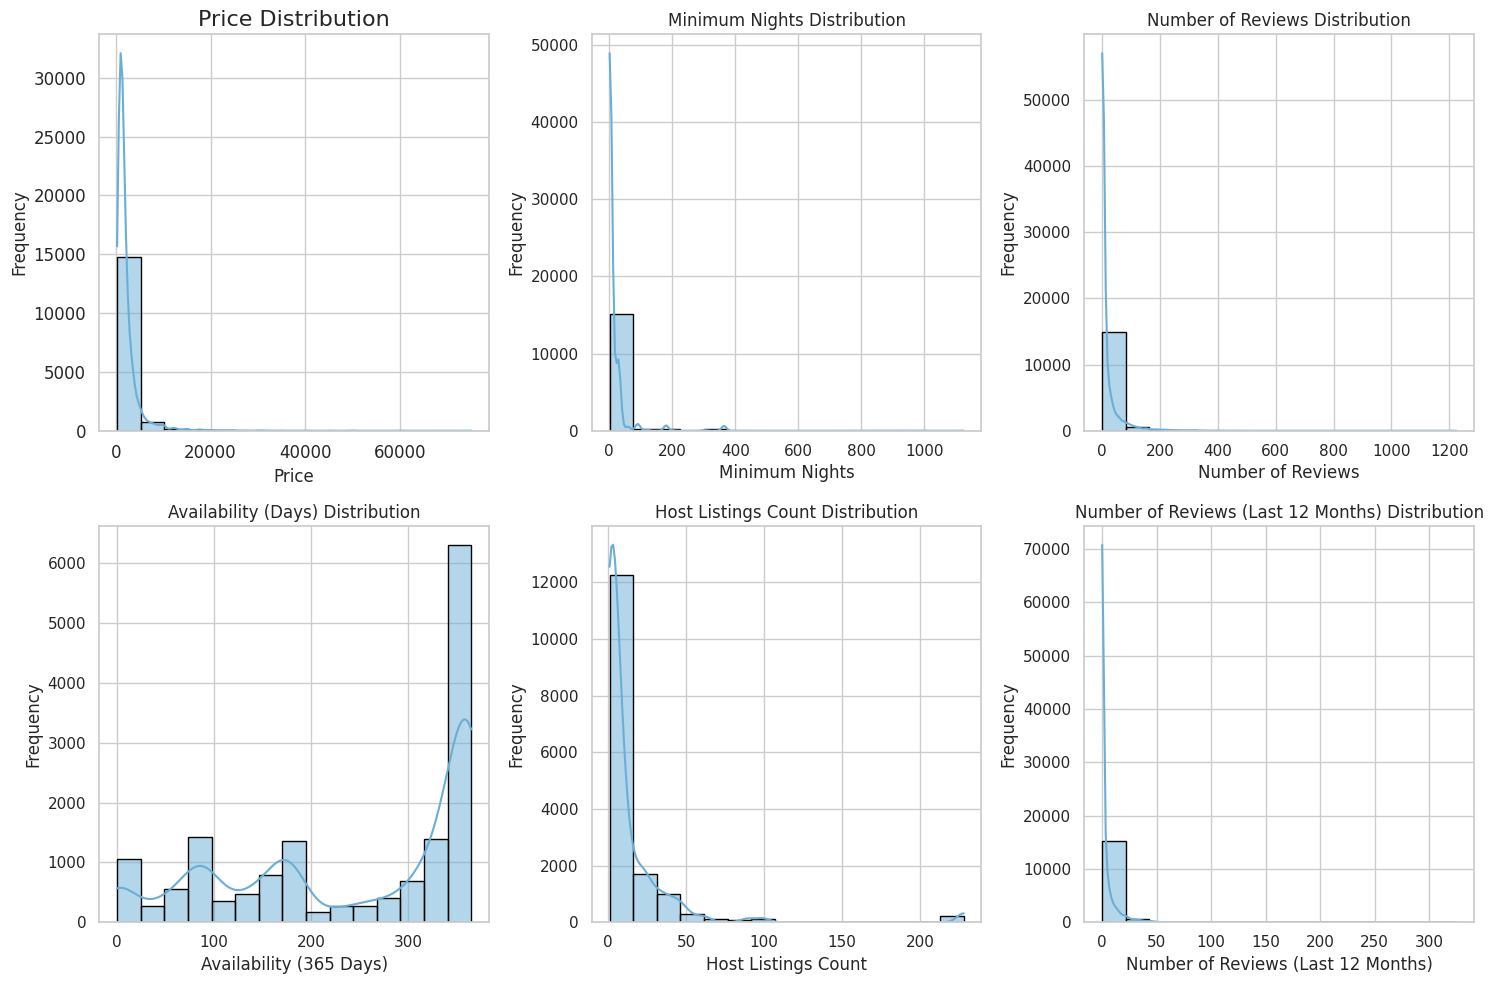

In [69]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(15, 10))
color_palette = sns.color_palette("Blues", n_colors=5)

# Histogram for Price
plt.subplot(2, 3, 1)
sns.histplot(df['price'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency',)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Histogram for Minimum Nights
plt.subplot(2, 3, 2)
sns.histplot(df['minimum_nights'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Histogram for Number of Reviews
plt.subplot(2, 3, 3)
sns.histplot(df['number_of_reviews'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# Histogram for Availability 365
plt.subplot(2, 3, 4)
sns.histplot(df['availability_365'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Availability (Days) Distribution')
plt.xlabel('Availability (365 Days)')
plt.ylabel('Frequency')

# Histogram for Calculated Host Listings Count
plt.subplot(2, 3, 5)
sns.histplot(df['calculated_host_listings_count'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Host Listings Count Distribution')
plt.xlabel('Host Listings Count')
plt.ylabel('Frequency')

# Histogram for Number of Reviews Last Twelve Months
plt.subplot(2, 3, 6)
sns.histplot(df['number_of_reviews_ltm'], bins=15, kde=True, color=color_palette[2], edgecolor='black')
plt.title('Number of Reviews (Last 12 Months) Distribution')
plt.xlabel('Number of Reviews (Last 12 Months)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd
from scipy.stats import shapiro, skew, kstest

def hypothesis_test_and_skewness(df):
    results = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Shapiro-Wilk Test
            shapiro_statistic, shapiro_p_value = shapiro(df[col])

            # Kolmogorov-Smirnov Test
            ks_statistic, ks_p_value = kstest(df[col], 'norm')

            # Skewness
            skewness_value = skew(df[col])

            results.append({
                'Column': col,
                'Shapiro-Wilk Statistic': shapiro_statistic,
                'Shapiro-Wilk P-value': shapiro_p_value,
                'Kolmogorov-Smirnov Statistic': ks_statistic,
                'Kolmogorov-Smirnov P-value': ks_p_value,
                'Skewness': skewness_value
            })
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
results_table = hypothesis_test_and_skewness(df)
results_table

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15808.
  res = hypotest_fun_out(*samples, **kwds)


Column  Shapiro-Wilk Statistic  \
0                       Unnamed: 0                0.954860   
1                               id                0.540575   
2                          host_id                0.903221   
3                         latitude                0.903229   
4                        longitude                0.952207   
5                            price                0.412566   
6                   minimum_nights                0.279484   
7                number_of_reviews                0.441105   
8                reviews_per_month                0.579502   
9   calculated_host_listings_count                0.417898   
10                availability_365                0.832322   
11           number_of_reviews_ltm                0.412163   

    Shapiro-Wilk P-value  Kolmogorov-Smirnov Statistic  \
0           5.302640e-56                      0.999715   
1          1.241193e-107                      1.000000   
2           4.365036e-71                      1.000000   
3           4.380770e-71                      1.000000   
4           4.558264e-57                      1.000000   
5          4.190163e-114                      1.000000   
6          1.257427e-119                      0.841345   
7          8.893041e-113                      0.502300   
8          2.387378e-105                      0.500000   
9          7.341072e-114                      0.841345   
10          4.207349e-83                      0.941517   
11         4.017056e-114                      0.500000   

    Kolmogorov-Smirnov P-value  Skewness  
0                          0.0 -0.000545  
1                          0.0  1.352787  
2                          0.0  0.814211  
3                          0.0  1.402188  
4                          0.0  0.559577  
5                          0.0  8.686367  
6                          0.0  8.279053  
7                          0.0  6.255650  
8                          0.0  4.622850  
9                          0.0  5.378457  
10                         0.0 -0.577009  
11                         0.0  9.714027

The table shows that all numeric columns are non-normally distributed and have significant skewness

In [71]:
df.to_excel('cleaned_data.xlsx', index=False)

## 4. Exploratory Data Analysis ( EDA )

### Univariate Analysis

#### Price Distribution

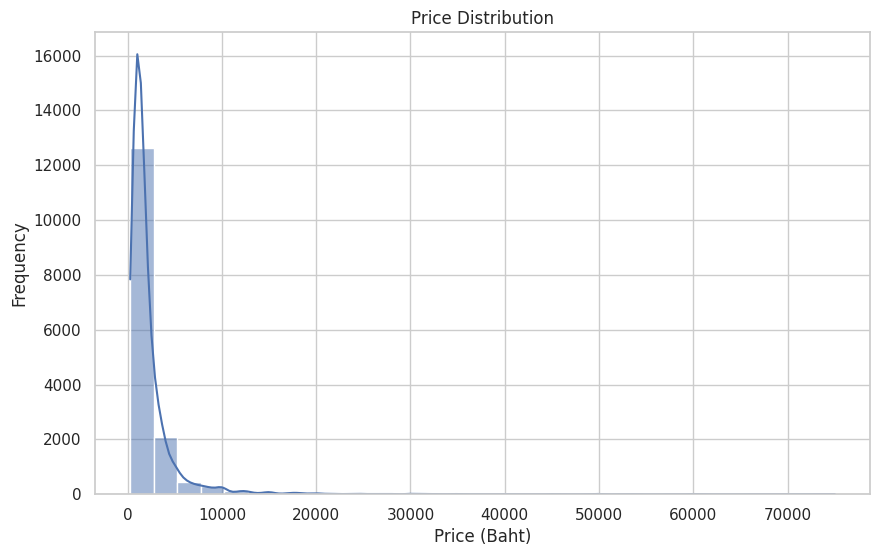

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Baht)')
plt.ylabel('Frequency')
plt.show()

The histogram provided illustrates the price distribution of a dataset, representing Airbnb services priced in **Baht**. Here are some key observations and potential insights that can be extracted from this visualization.

##### Key Observations

1. `Right-Skewed Distribution`:
   - The histogram shows a significant concentration of prices at the lower end (near zero), indicating that most listings are priced relatively low.
   - There are very few listings with high prices, which suggests that the dataset may contain a majority of budget-friendly options.

2. `Frequency Peaks`:
   - The highest frequency appears to be around the lowest price range, suggesting that many listings fall within this category.
   - There are noticeable drops in frequency as prices increase, indicating a decrease in the number of higher-priced listings.

3. `Potential Outliers`:
   - The presence of a long tail on the right side of the histogram may indicate a few high-priced outliers. These could be luxury listings or unique offerings that are significantly more expensive than the majority.

##### Insights and Implications

- `Market Segmentation`:
  - The data suggests a market that is primarily focused on lower-priced listings, which could be beneficial for businesses targeting budget-conscious consumers.
  
- `Pricing Strategy`:
  - If you are a host, this distribution can inform pricing strategies. Consider offering more listings in the lower price range to capture the majority of the market.

- `Consumer Behavior`:
  - The concentration of low-priced listings may reflect consumer preferences or economic conditions, indicating that consumers are more inclined to rent affordable options.



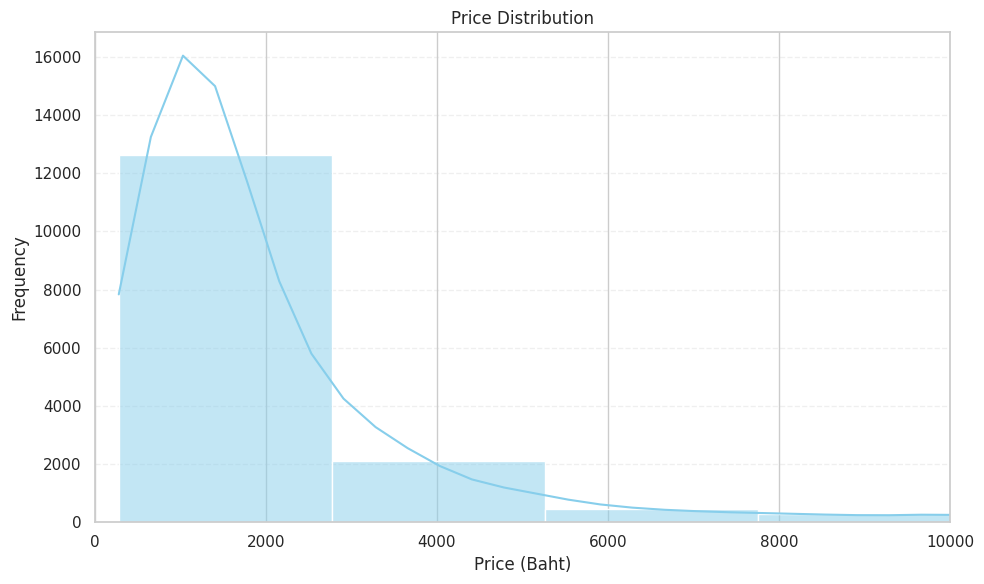

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (Baht)')
plt.ylabel('Frequency')
plt.xlim(0, 10000)  # Limit price to max 15,000
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### Room Type Distribution

<ipython-input-105-be718df51a1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')


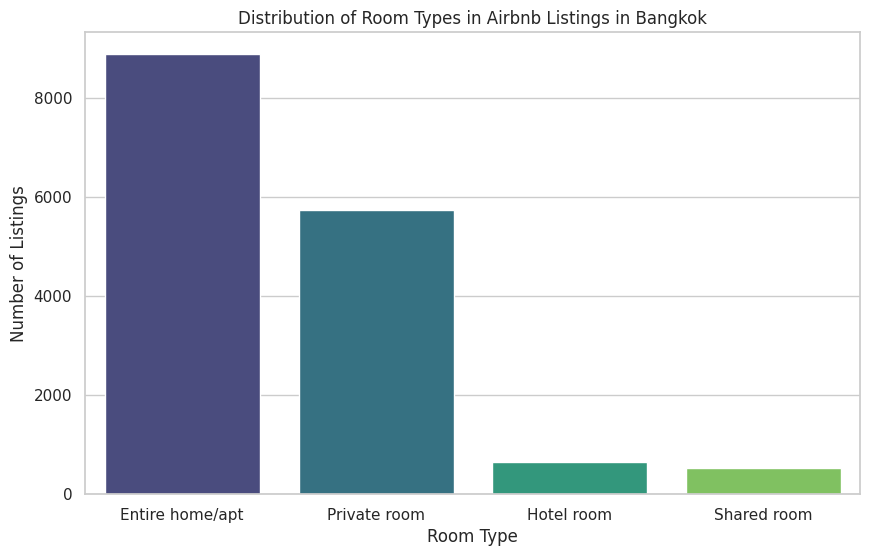

In [105]:
# Count of room types
room_type_counts = df['room_type'].value_counts()

# Bar plot of room types
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Distribution of Room Types in Airbnb Listings in Bangkok')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

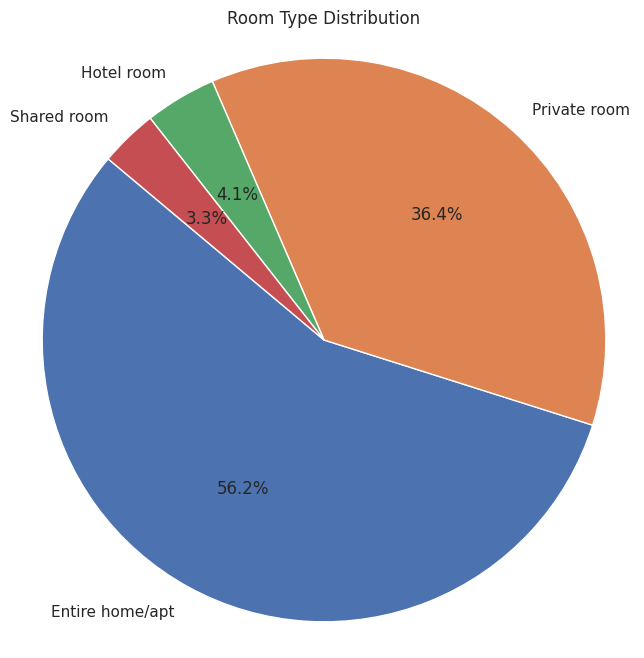

In [106]:
# Pie chart for room_type distribution
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Neighbourhood Count

<ipython-input-107-622cf0b30d8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.values , y=neighborhood_counts.index, palette='magma')


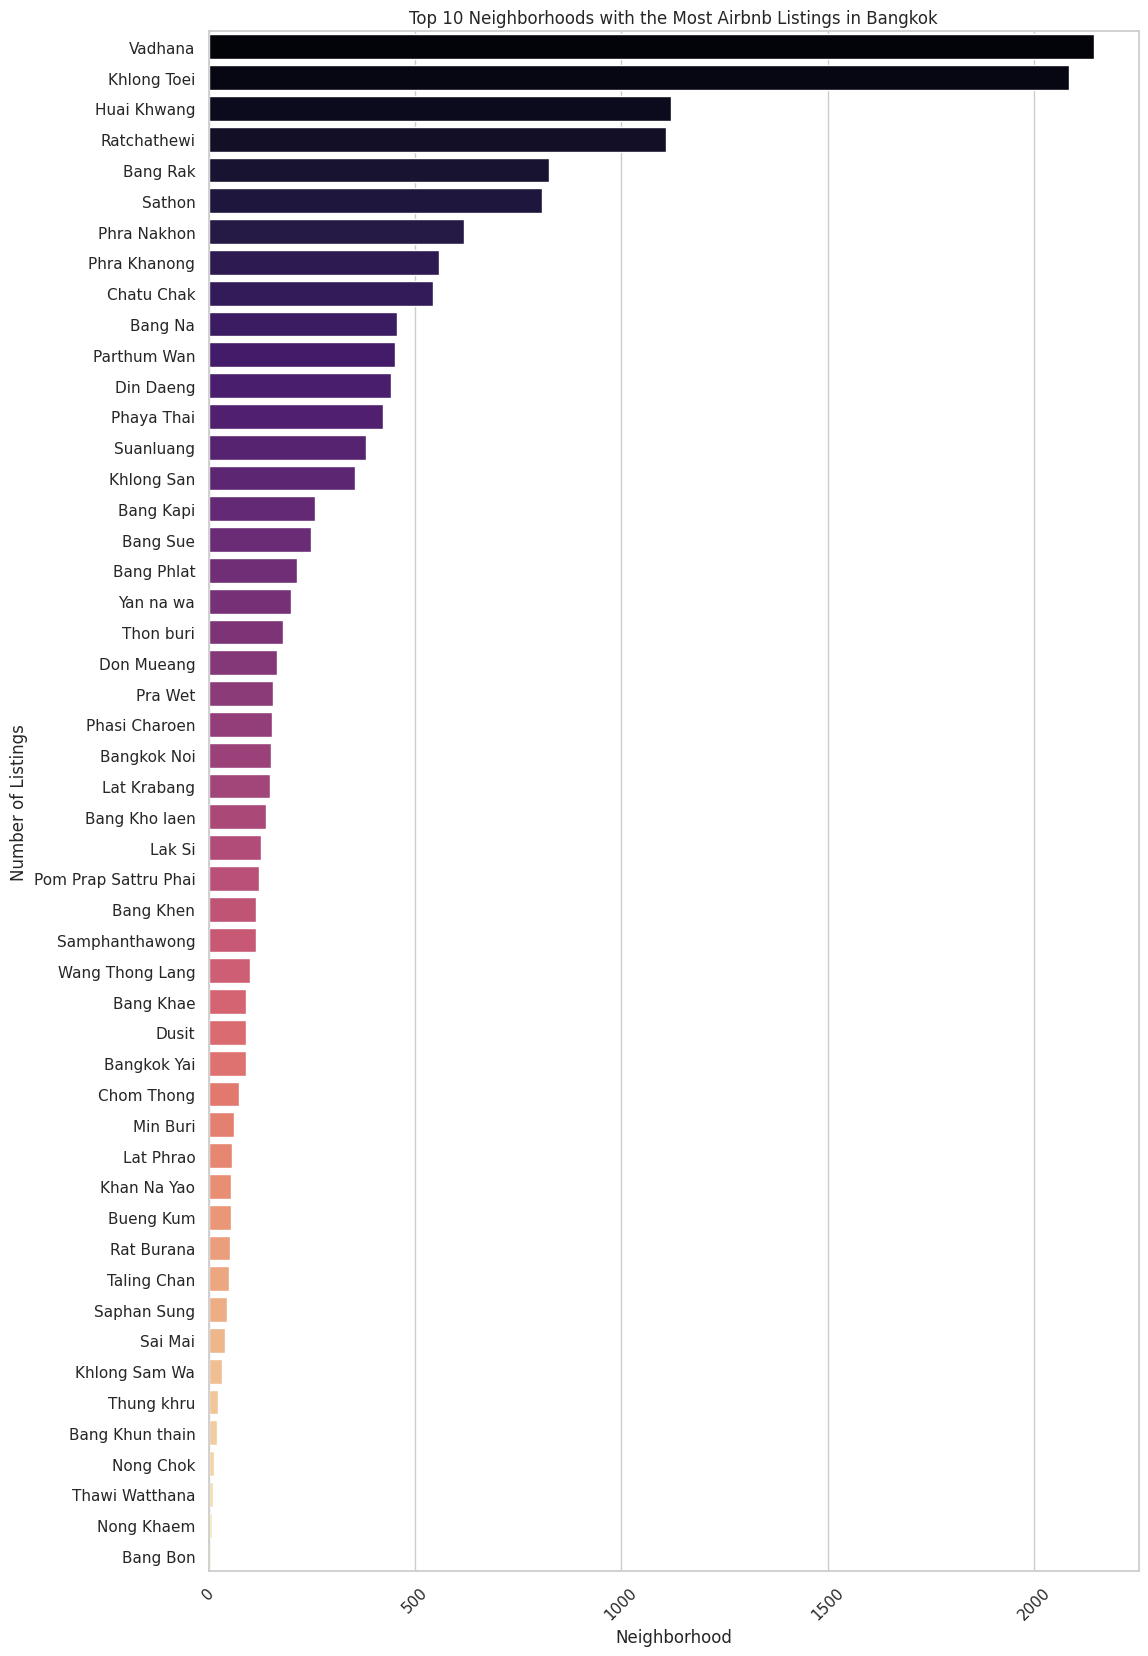

In [107]:
# Count of listings by neighborhood
neighborhood_counts = df['neighbourhood'].value_counts()

# Bar plot of neighborhoods (top 10)
plt.figure(figsize=(12, 20))
sns.barplot(x=neighborhood_counts.values , y=neighborhood_counts.index, palette='magma')
plt.title('Top 10 Neighborhoods with the Most Airbnb Listings in Bangkok')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

<ipython-input-155-eee9dcdb4ee7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


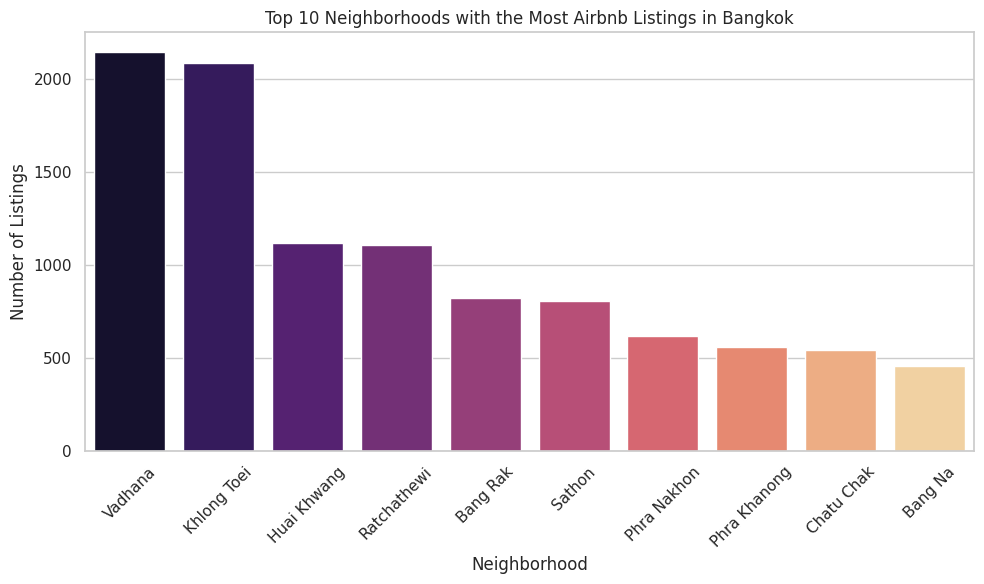

In [155]:
# Count of listings by neighborhood
neighborhood_counts = df['neighbourhood'].value_counts()

# Bar plot of neighborhoods (top 10) - Vertical
plt.figure(figsize=(10, 6))
sns.barplot(
    x=neighborhood_counts.head(10).index,
    y=neighborhood_counts.head(10).values,
    palette='magma'
)
plt.title('Top 10 Neighborhoods with the Most Airbnb Listings in Bangkok')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Distribution of Host Listings

Text(0, 0.5, 'Frequency')

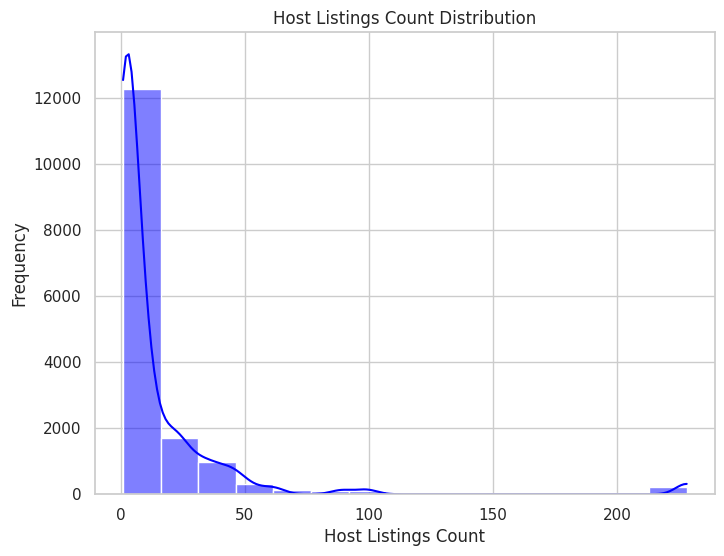

In [148]:
plt.figure(figsize=(8, 6))
sns.histplot(df['calculated_host_listings_count'], bins=15, kde=True, color='Blue')
plt.title('Host Listings Count Distribution')
plt.xlabel('Host Listings Count')
plt.ylabel('Frequency')

#### Feature Engineering

In [149]:
#Definisikan beberapa kategori host berdasarkan jumlah listing
def categorize_host_experience(listings_count):
    if listings_count == 1:
        return 'Tidak Berpengalaman'
    elif 2 <= listings_count <= 5:
        return 'Berpengalaman Sedang'
    else:
        return 'Berpengalaman Tinggi'

#Terapkan fungsi ke kolom calculated_host_listings_count
df['host_experience'] = df['calculated_host_listings_count'].apply(categorize_host_experience)

#### Host Experience

<ipython-input-150-e2f699231f19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='host_experience', y='number_of_reviews', data=df, palette='viridis', order=['Tidak Berpengalaman', 'Berpengalaman Sedang', 'Berpengalaman Tinggi'])


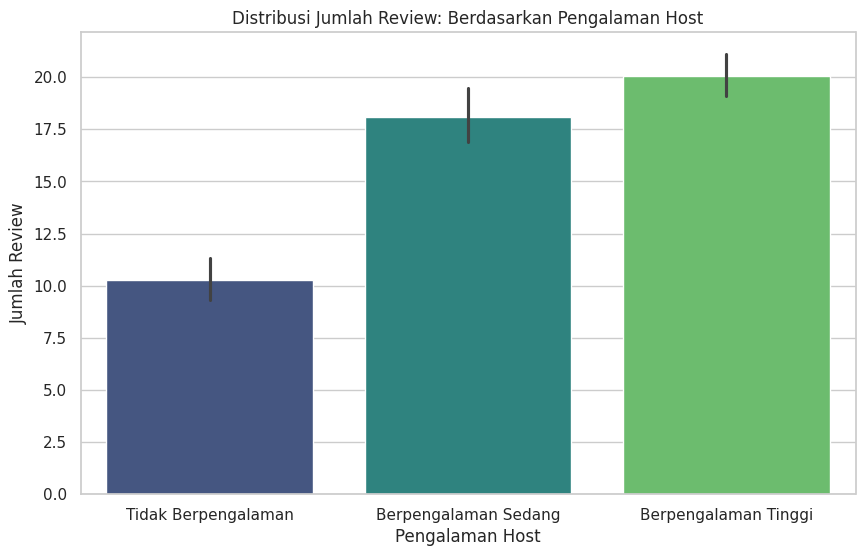

In [150]:
# Buat boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='host_experience', y='number_of_reviews', data=df, palette='viridis', order=['Tidak Berpengalaman', 'Berpengalaman Sedang', 'Berpengalaman Tinggi'])
plt.title('Distribusi Jumlah Review: Berdasarkan Pengalaman Host')
plt.xlabel('Pengalaman Host')
plt.ylabel('Jumlah Review')
plt.show()

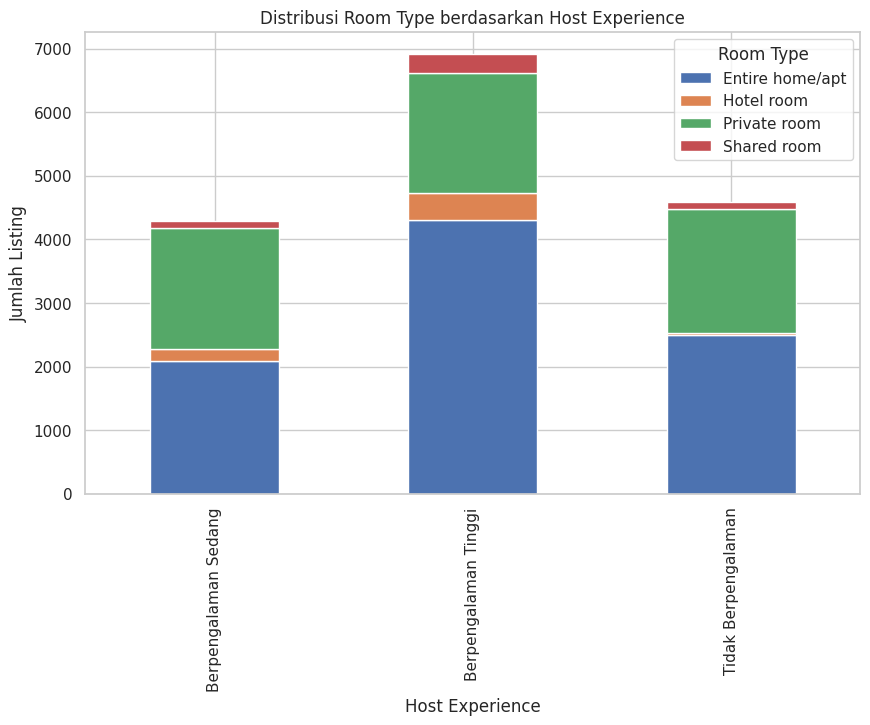

In [151]:
grouped_data = df.groupby(['host_experience', 'room_type']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Room Type berdasarkan Host Experience')
plt.xlabel('Host Experience')
plt.ylabel('Jumlah Listing')
plt.legend(title='Room Type')
plt.show()

### Bivariate Analysis

#### Price vs Number of Review

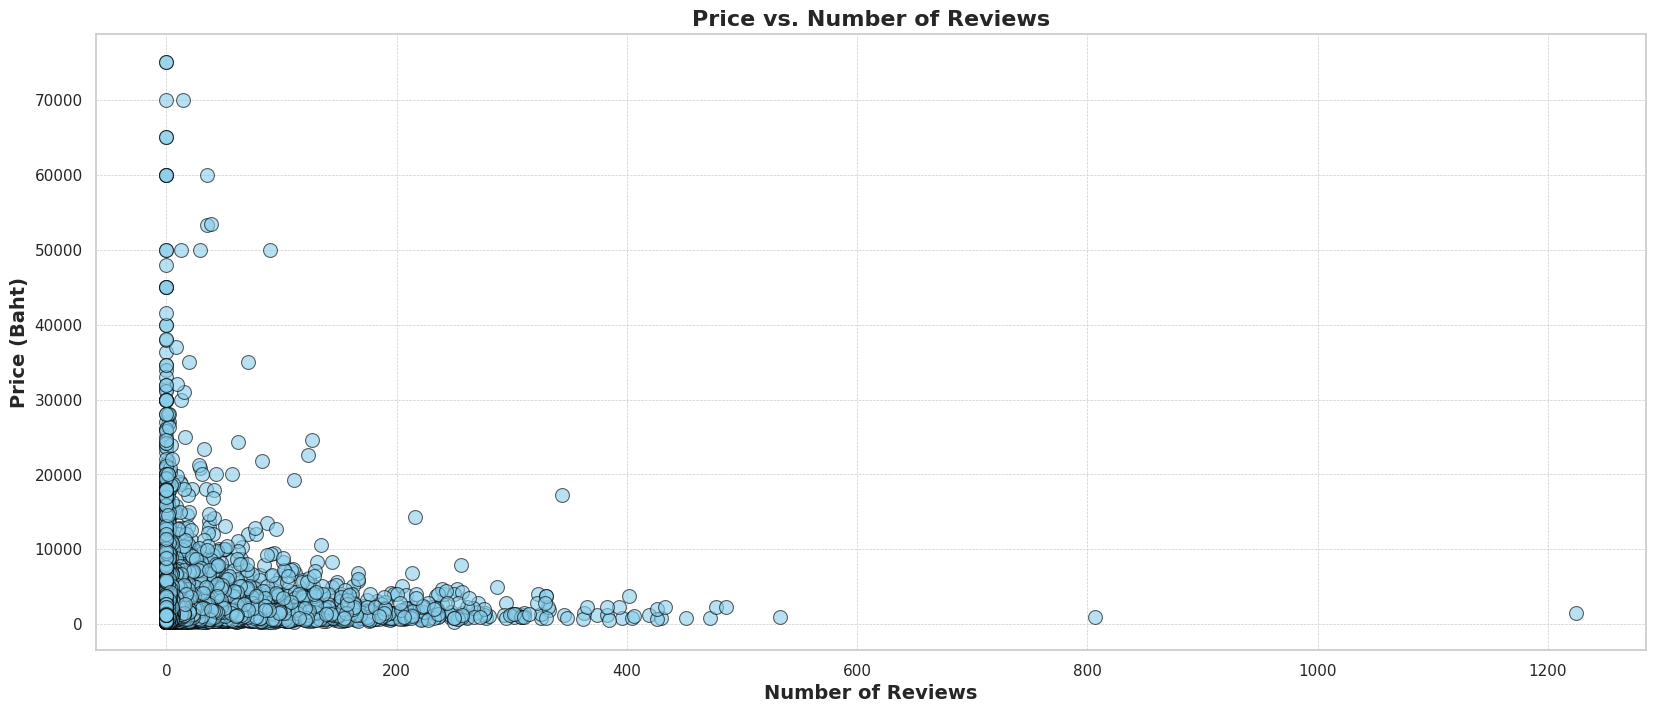

In [77]:
# Set the seaborn theme
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(20, 8))
sns.scatterplot(
    data=df,
    x='number_of_reviews',
    y='price',
    color='skyblue',
    edgecolor='black',
    s=100,
    alpha=0.6,
    marker='o'
)

# Add titles and labels
plt.title('Price vs. Number of Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.ylabel('Price (Baht)', fontsize=14, fontweight='bold')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### Price vs Neighbourhood

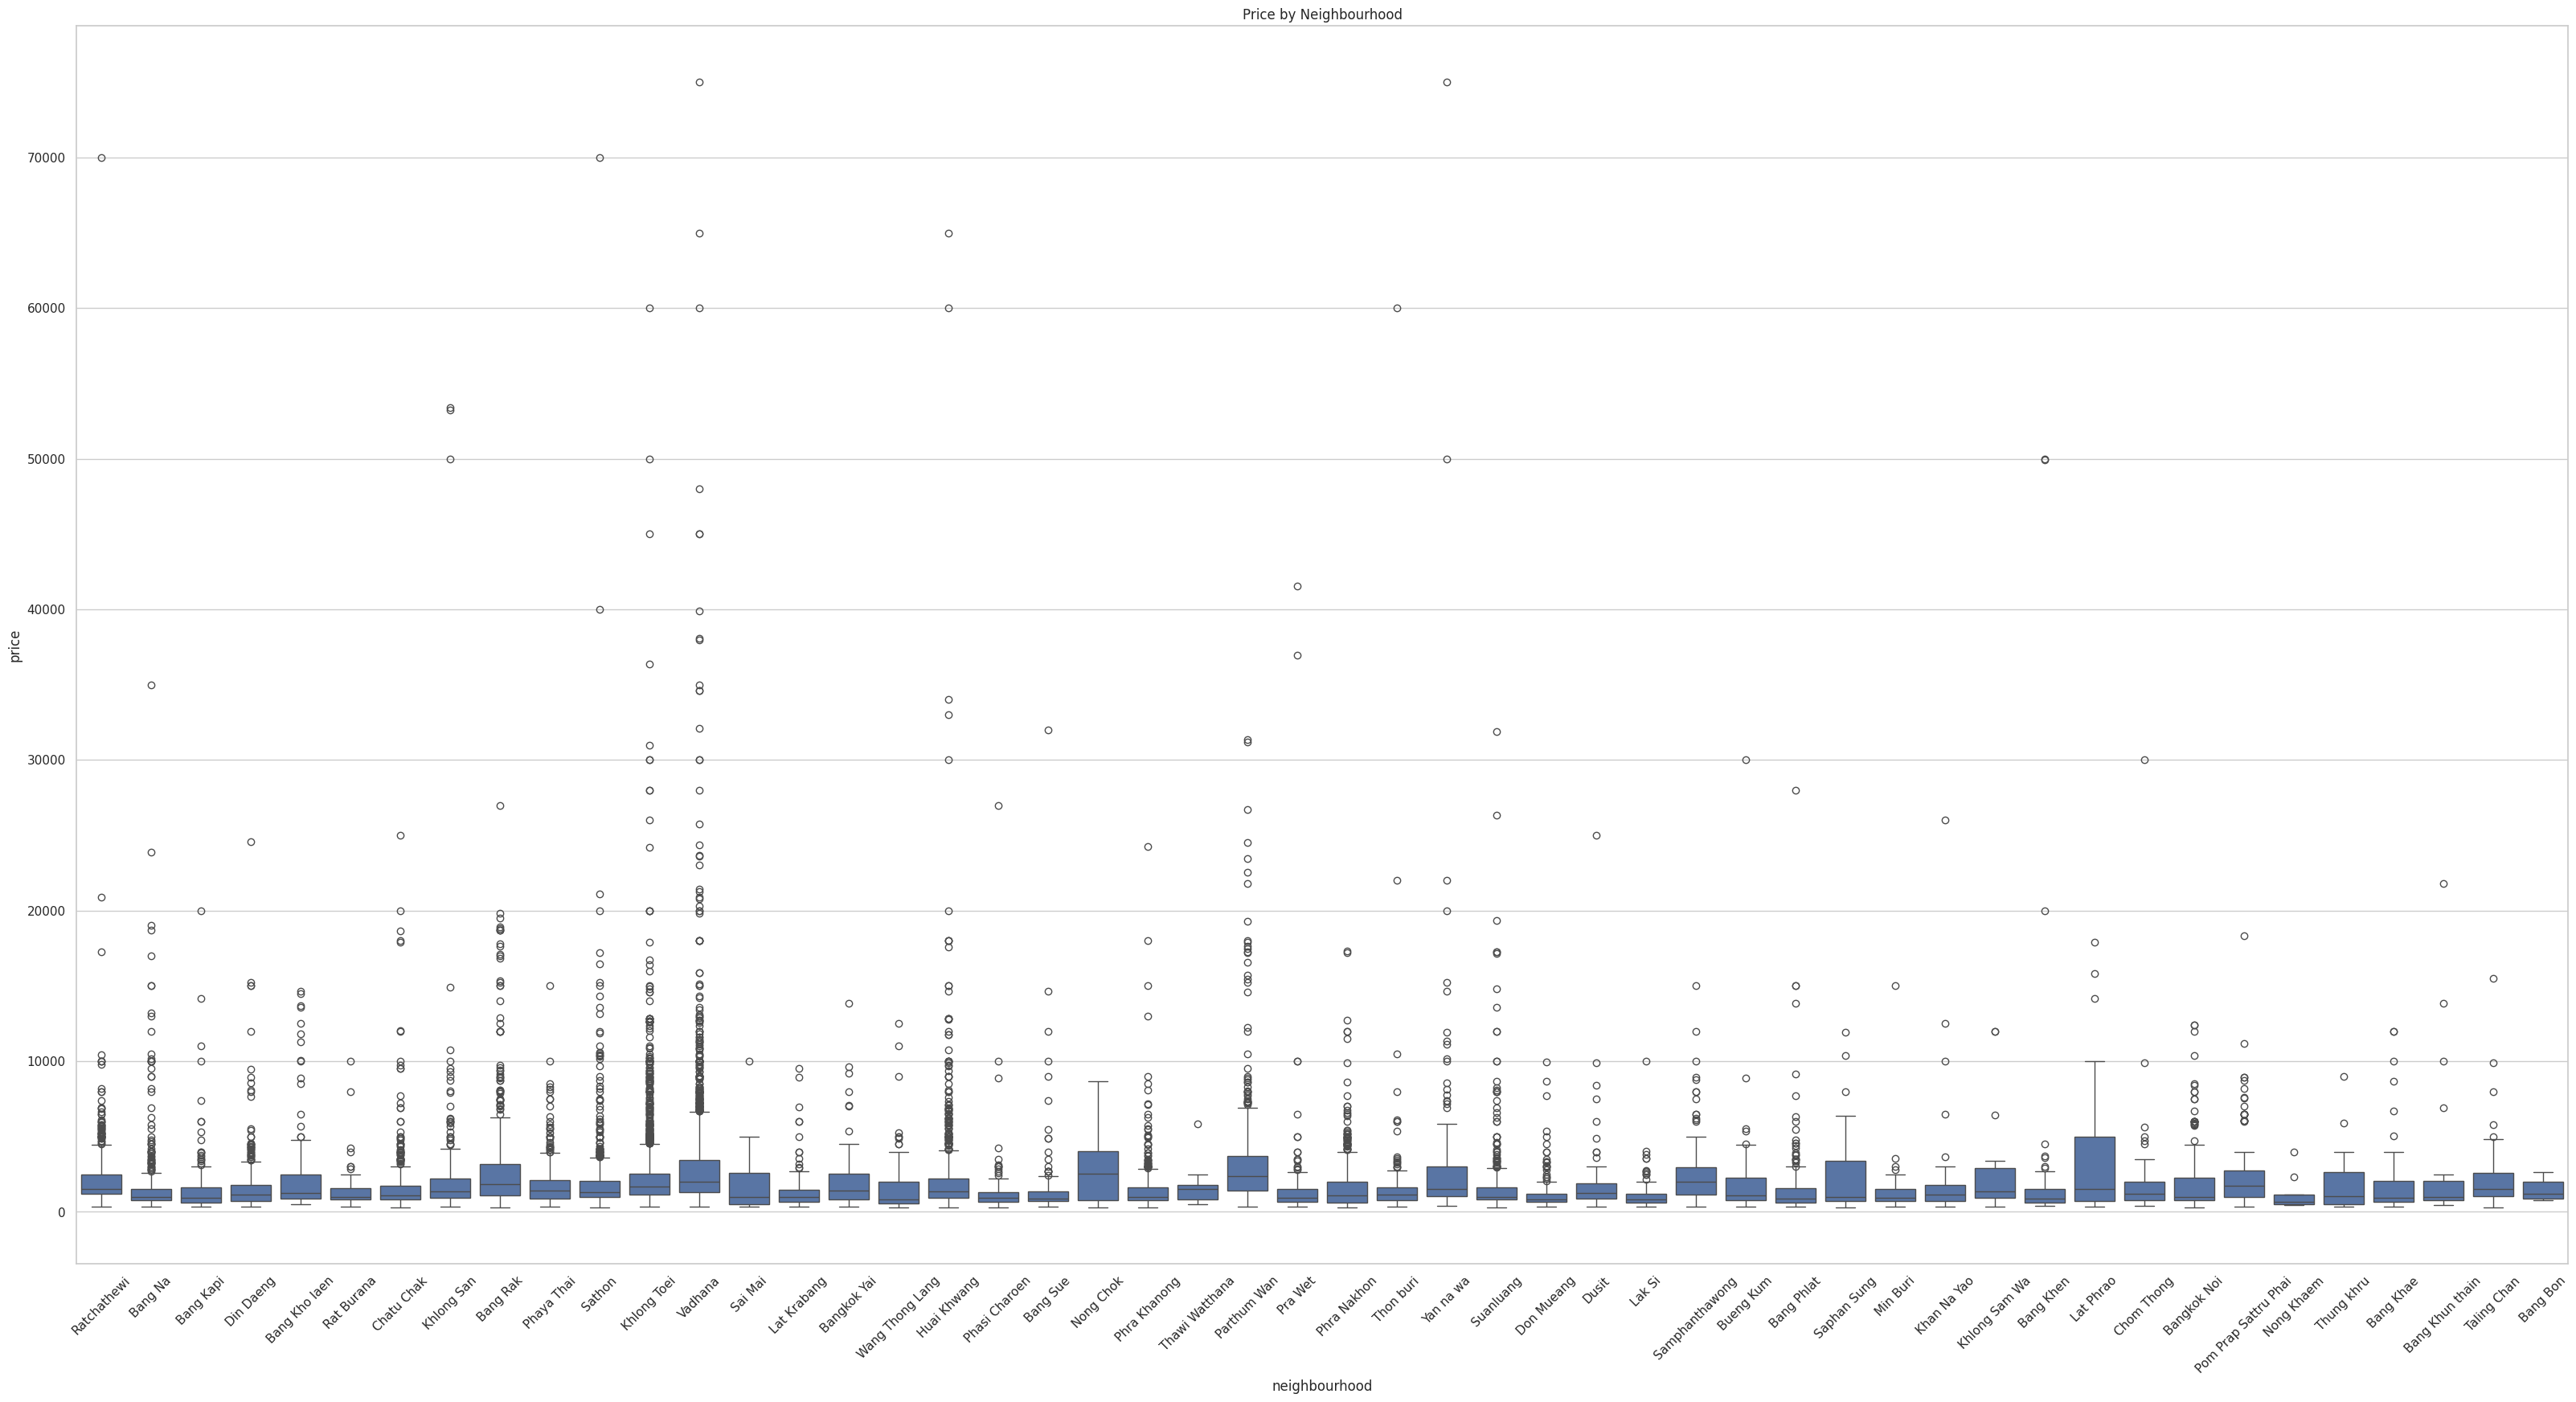

In [158]:
plt.figure(figsize=(40, 20))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.title('Price by Neighbourhood')
plt.xticks(rotation=45)
plt.show()

<ipython-input-159-ea36ddd81270>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='neighbourhood', y='price', palette='viridis')


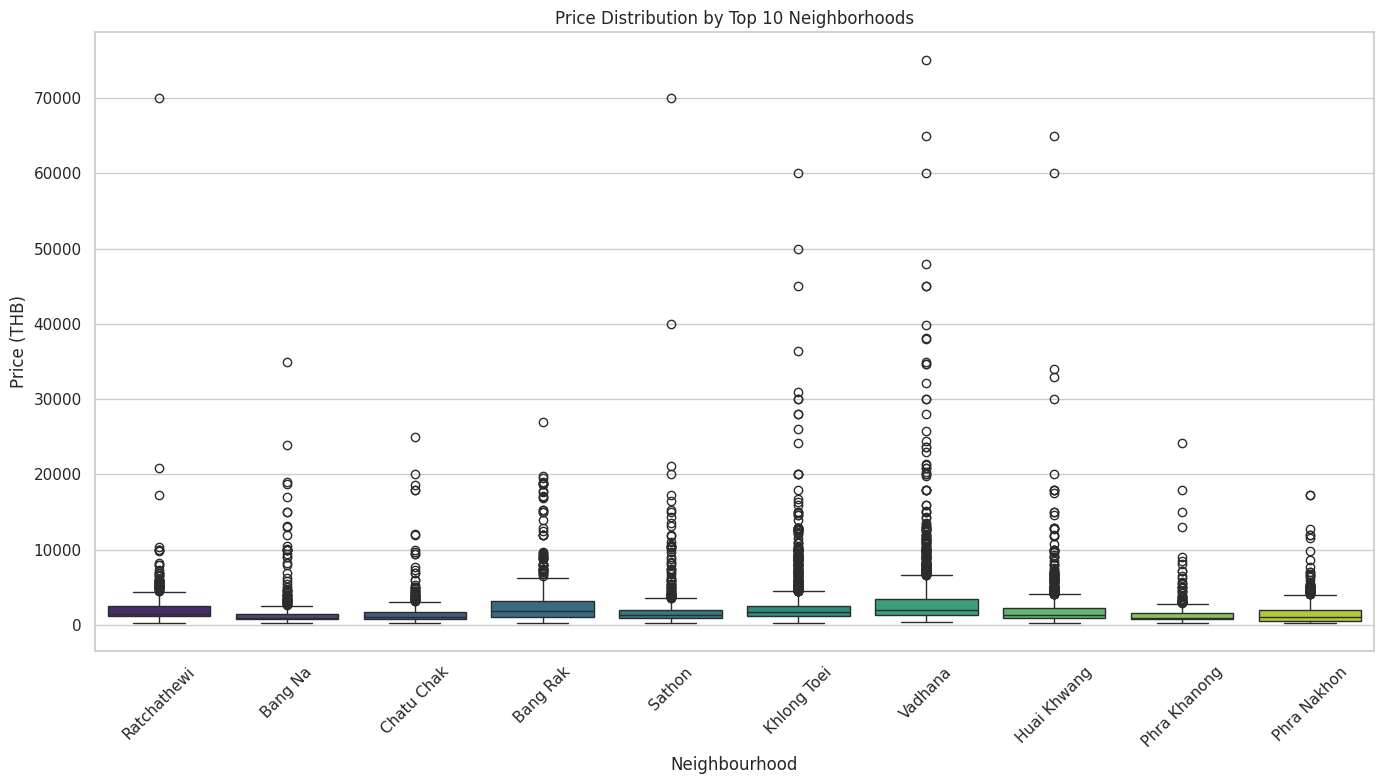

In [159]:
# Get top 10 neighborhoods by listing count
top_10_neighbourhoods = df['neighbourhood'].value_counts().head(10).index

# Filter data for those top 10 only
df_top10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)]

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top10, x='neighbourhood', y='price', palette='viridis')
plt.title('Price Distribution by Top 10 Neighborhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (THB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-79-5a1bb419d6f1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='price', y='neighbourhood_ordered', palette='viridis')


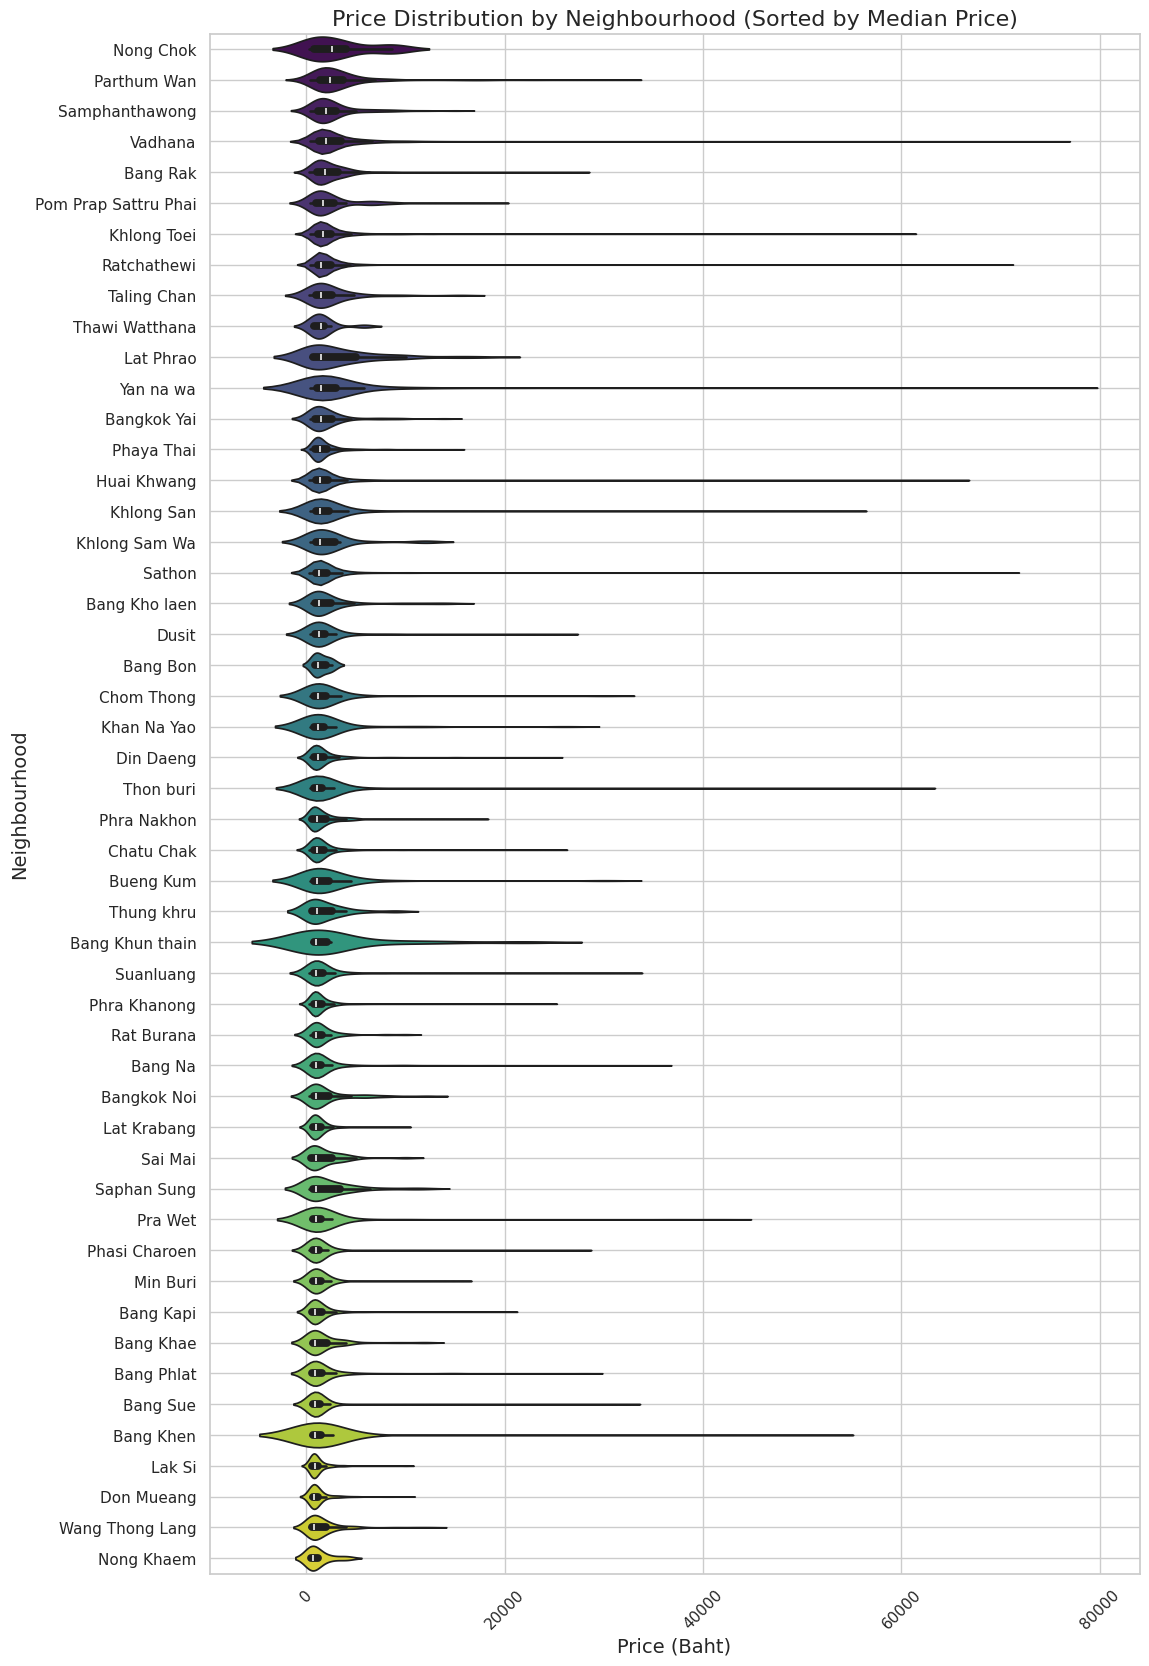

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the median price by neighborhood
median_prices = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create a new column in the DataFrame for ordered neighborhoods
df['neighbourhood_ordered'] = pd.Categorical(df['neighbourhood'], categories=median_prices.index, ordered=True)

# Set the figure size
plt.figure(figsize=(12, 20))

# Create the violin plot with ordered neighborhoods
sns.violinplot(data=df, x='price', y='neighbourhood_ordered', palette='viridis')

# Set the title and labels
plt.title('Price Distribution by Neighbourhood (Sorted by Median Price)', fontsize=16)
plt.xlabel('Price (Baht)', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


#### Price Vs Room Type

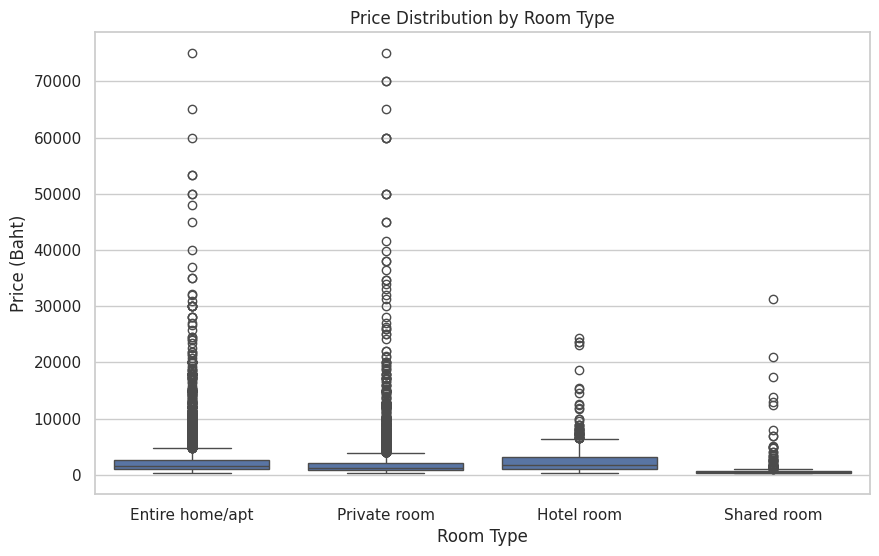

In [80]:
# Box plot for price by room type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (Baht)')
plt.show()


<ipython-input-81-78bc2a5219cc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=avg_price, x='room_type', y='price', palette='viridis', edgecolor='black', )


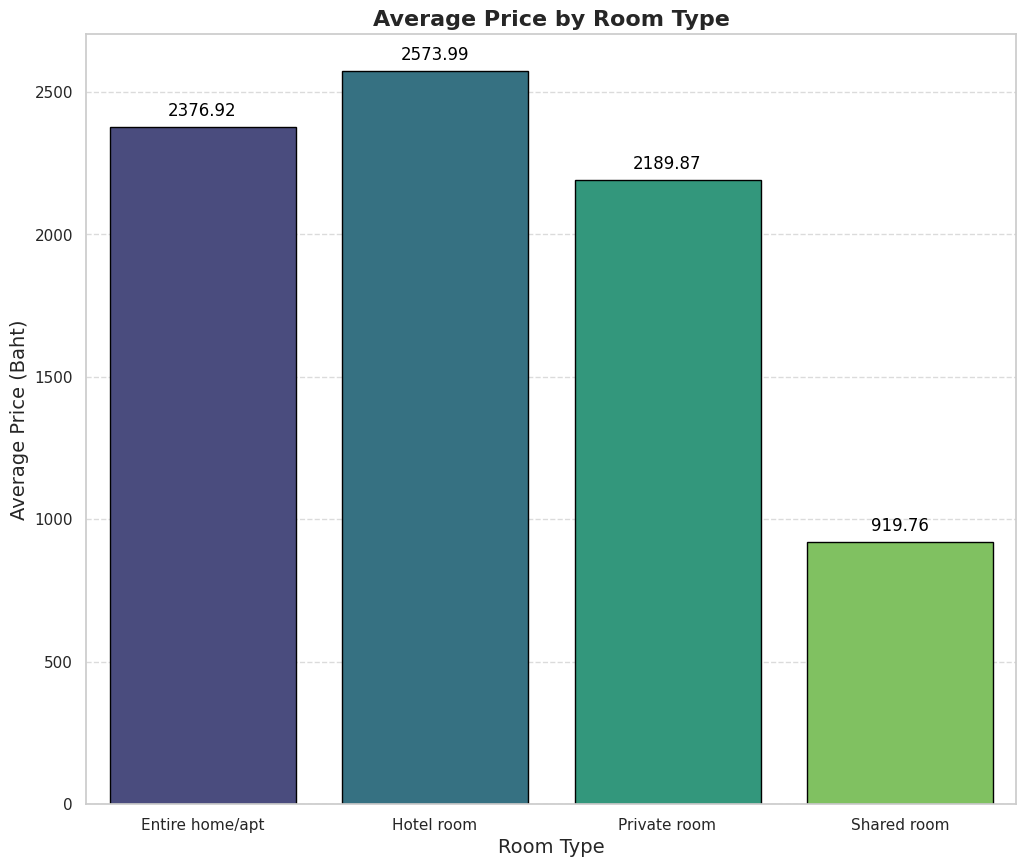

In [81]:
avg_price = df.groupby('room_type')['price'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(data=avg_price, x='room_type', y='price', palette='viridis', edgecolor='black', )

# Add title and labels
plt.title('Average Price by Room Type', fontsize=16, fontweight='bold')
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Price (Baht)', fontsize=14)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Pair Plot

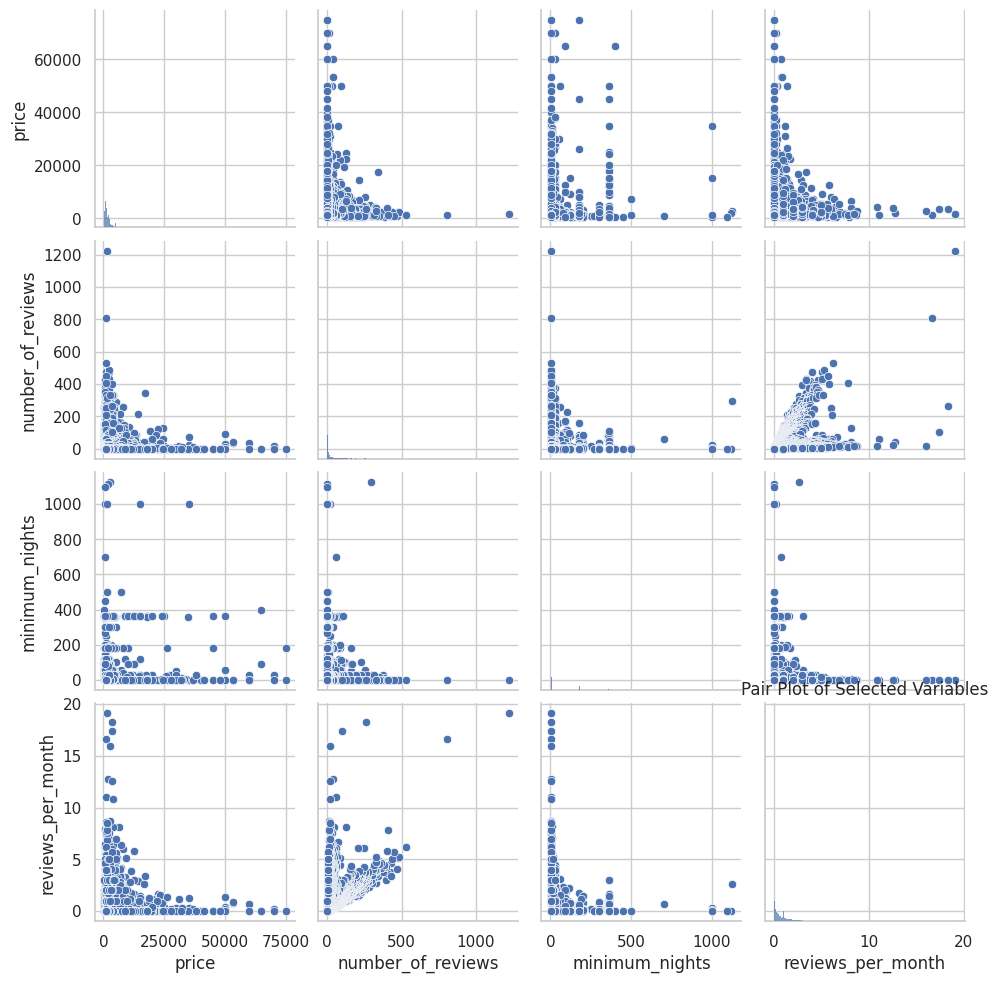

In [82]:
# Pair plot for selected numerical variables
sns.pairplot(df[['price', 'number_of_reviews', 'minimum_nights', 'reviews_per_month']])
plt.title('Pair Plot of Selected Variables')
plt.show()

#### Correlation

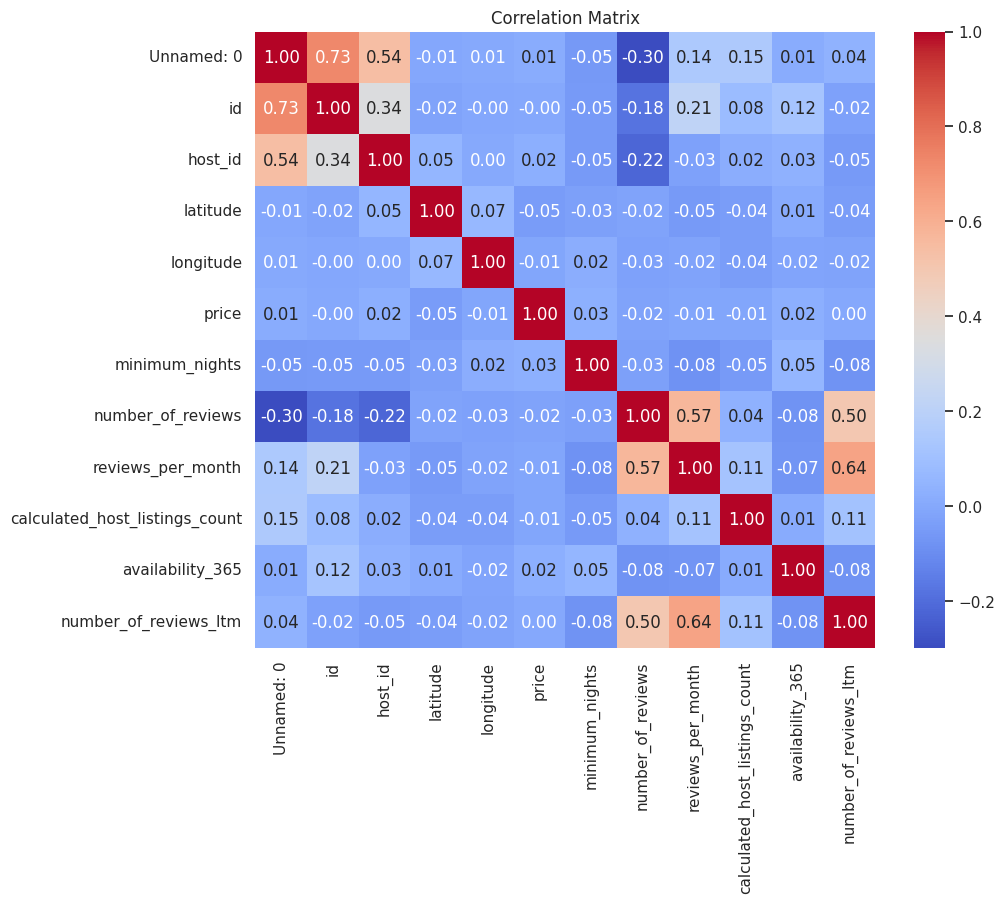

In [83]:
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. **Strong Positive Correlations**:
   - **`number_of_reviews` and `reviews_per_month`**: The correlation coefficient is **0.57**, indicating a moderate positive relationship. This suggests that listings with more reviews tend to have higher monthly review counts.
   - **`reviews_per_month` and `number_of_reviews_ltm`**: The correlation is **0.64**, indicating a strong positive relationship. This implies that listings with more reviews per month also tend to have a higher count of reviews in the last twelve months.

2. **Moderate Positive Correlation**:
   - **`price` and `number_of_reviews`**: The correlation is **0.21**, suggesting a weak positive relationship. Higher-priced listings may receive slightly more reviews, but the relationship is not strong.
   - **`minimum_nights` and `number_of_reviews`**: The correlation is **0.50**, indicating a moderate positive relationship. Listings with higher minimum night requirements may receive more reviews.

3. **Negative Correlations**:
   - **`number_of_reviews` and `host_id`**: The correlation is **-0.22**, indicating a weak negative relationship. This suggests that listings with certain host IDs may receive fewer reviews.
   - **`minimum_nights` and `price`**: The correlation is **-0.03**, indicating a negligible relationship. This suggests that the minimum night requirement does not significantly affect the price.

4. **Weak Correlations**:
   - Most other correlations are weak (close to 0), indicating that those features do not have a significant linear relationship with each other.


##5. Data Analysis

**So then we aim to determine the best neighbourhood in Bangkok to open a new Airbnb Property, based on:**

- Potential income from reviews

- Demand indicators (review frequency)

- Listing availability

- Market competition (number of listings)

- Preferred room types

In [84]:
# Estimate monthly income = price * reviews_per_month
df["estimated_monthly_income"] = df["price"] * df["reviews_per_month"]

# Flag entire homes
df["is_entire_home"] = df["room_type"] == "Entire home/apt"

In [86]:
agg_df = df.groupby("neighbourhood").agg({
    "price": "mean",
    "reviews_per_month": "mean",
    "estimated_monthly_income": "mean",
    "availability_365": "mean",
    "id": "count",
    "is_entire_home": "mean"
}).rename(columns={
    "price": "avg_price",
    "reviews_per_month": "avg_reviews_pm",
    "estimated_monthly_income": "avg_monthly_income",
    "availability_365": "avg_availability",
    "id": "num_listings",
    "is_entire_home": "pct_entire_home"
}).reset_index()

In [87]:
from sklearn.preprocessing import MinMaxScaler

features = ["avg_monthly_income", "avg_reviews_pm", "avg_availability", "num_listings", "pct_entire_home"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(agg_df[features])

scaled_df = pd.DataFrame(scaled, columns=[f"norm_{col}" for col in features])
agg_df = pd.concat([agg_df, scaled_df], axis=1)

# Create a custom weighted score
agg_df["location_score"] = (
    0.4 * agg_df["norm_avg_monthly_income"] +
    0.25 * agg_df["norm_avg_reviews_pm"] +
    0.15 * agg_df["norm_avg_availability"] -
    0.1 * agg_df["norm_num_listings"] +  # Penalize high competition
    0.1 * agg_df["norm_pct_entire_home"]
)


In [88]:
top_areas = agg_df.sort_values(by="location_score", ascending=False).head(10)
top_areas[["neighbourhood", "location_score", "avg_price", "avg_monthly_income", "num_listings"]]


neighbourhood  location_score    avg_price  avg_monthly_income  \
22           Khlong Toei        0.682306  2517.048897         2130.943701   
29           Parthum Wan        0.622757  3515.664459         1997.389912   
47               Vadhana        0.551547  3225.602516         1859.955792   
41                Sathon        0.516848  2093.607673         1120.831436   
34  Pom Prap Sattru Phai        0.513708  2577.585366         1183.728130   
8               Bang Rak        0.503186  2696.840194         1522.805908   
37           Ratchathewi        0.446965  2041.468891         1122.745681   
15             Din Daeng        0.414686  1679.219955          935.795034   
31            Phaya Thai        0.398333  1793.907583          852.018555   
24           Lat Krabang        0.396486  1358.523490          683.831745   

    num_listings  
22          2086  
29           453  
47          2146  
41           808  
34           123  
8            826  
37          1109  
15           441  
31           422  
24           149

<ipython-input-93-b7d331ca8342>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_areas, y="neighbourhood", x="location_score", palette="viridis")


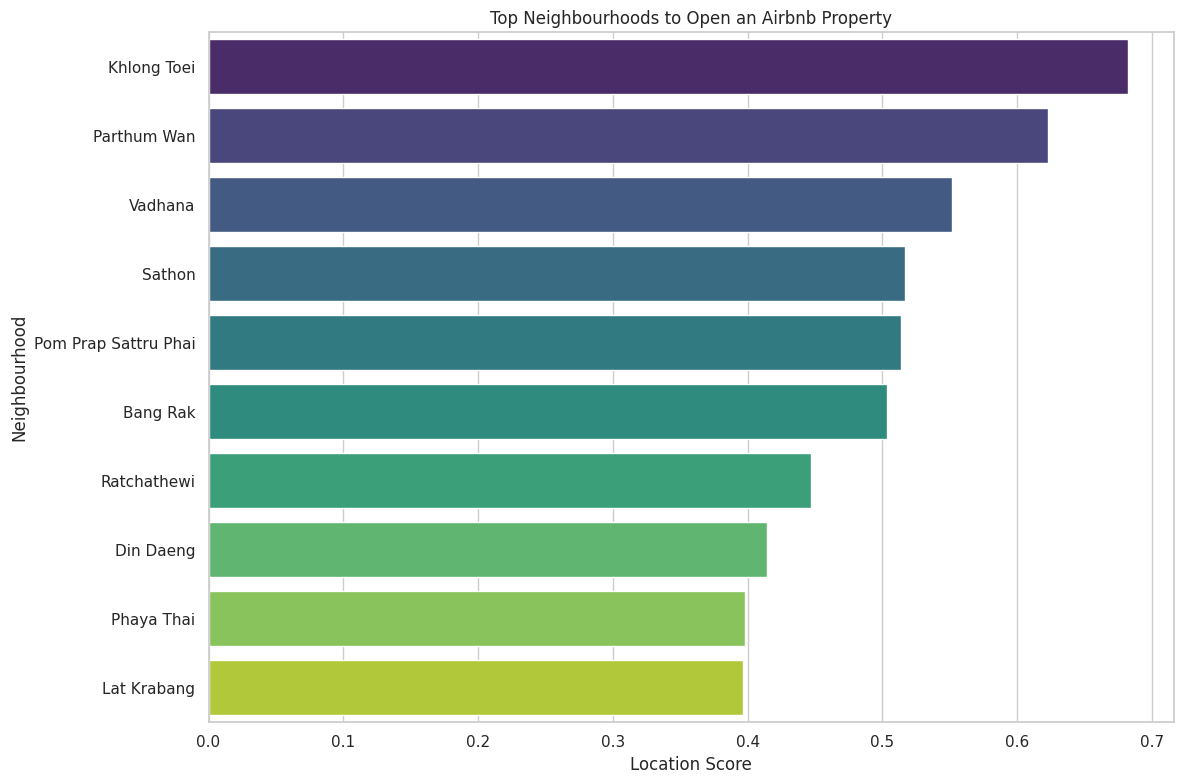

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Horizontal barplot of top neighbourhoods
plt.figure(figsize=(12, 8))
sns.barplot(data=top_areas, y="neighbourhood", x="location_score", palette="viridis")
plt.title("Top Neighbourhoods to Open an Airbnb Property")
plt.xlabel("Location Score")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()




Khlong Toei has the highest location score, making it the most favorable neighborhood for opening an Airbnb property.
Parthum Wan and Vadhana follow closely, indicating they are also highly suitable.Neighborhoods like Sathon, Pom Prap Sattru Phai, and Bang Rak have moderate scores, suggesting they are good options but not as optimal as the top three. The neighborhoods with lower scores include Ratchathewi, Din Daeng, and especially at the bottom, Lat Krabang.These areas might be less attractive for potential Airbnb hosts compared to others on this list.

Implications:

- Investors or hosts looking to open new properties should prioritize areas with higher location scores for potentially better returns.
- The data can guide strategic decisions in real estate investments within these neighborhoods.

Considerations:

- It's important to understand what factors contribute to these location scores (e.g., proximity to tourist attractions, transportation links).

### Why Khlong Toei Has the Highest Location Score

In [95]:
khlong_tei_data = top_areas[top_areas["neighbourhood"] == "Khlong Toei"]

khlong_tei_data[[
    "avg_price",
    "avg_monthly_income",
    "avg_reviews_pm",
    "avg_availability",
    "num_listings",
    "pct_entire_home",
    "location_score"
]].round(2)

avg_price  avg_monthly_income  avg_reviews_pm  avg_availability  \
22    2517.05             2130.94            0.87            232.61   

    num_listings  pct_entire_home  location_score  
22          2086             0.73            0.68

In [101]:
avg_nights_booked = df["reviews_per_month"] * 3 / 0.7 # assume 70% guests leave reviews
df["simulated_monthly_income"] = df["price"] * avg_nights_booked

<ipython-input-102-d2e747057004>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_income_by_area, x="simulated_monthly_income", y="neighbourhood", palette="coolwarm")


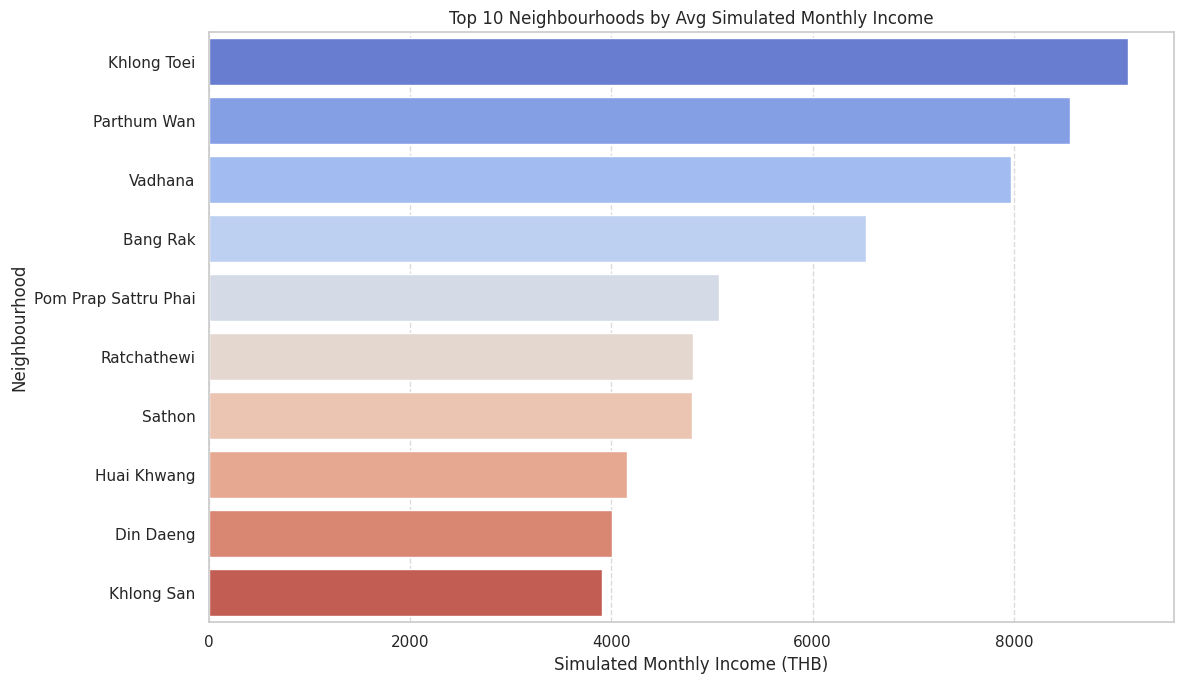

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean NaNs first
df_income = df.dropna(subset=["simulated_monthly_income", "neighbourhood"])

# Group and average
avg_income_by_area = (
    df_income.groupby("neighbourhood")["simulated_monthly_income"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_income_by_area, x="simulated_monthly_income", y="neighbourhood", palette="coolwarm")
plt.title("Top 10 Neighbourhoods by Avg Simulated Monthly Income")
plt.xlabel("Simulated Monthly Income (THB)")
plt.ylabel("Neighbourhood")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Khlong Toei ranks at the top with the highest average simulated monthly income, indicating it may be an economically vibrant area.

- Parthum Wan and Vadhana follow closely behind, suggesting they also have strong economic activity.

- The data suggests that areas with higher simulated monthly incomes might attract more businesses and investments, making them appealing for potential Airbnb hosts or other entrepreneurs.

### Price Distribution in Khlong Toei

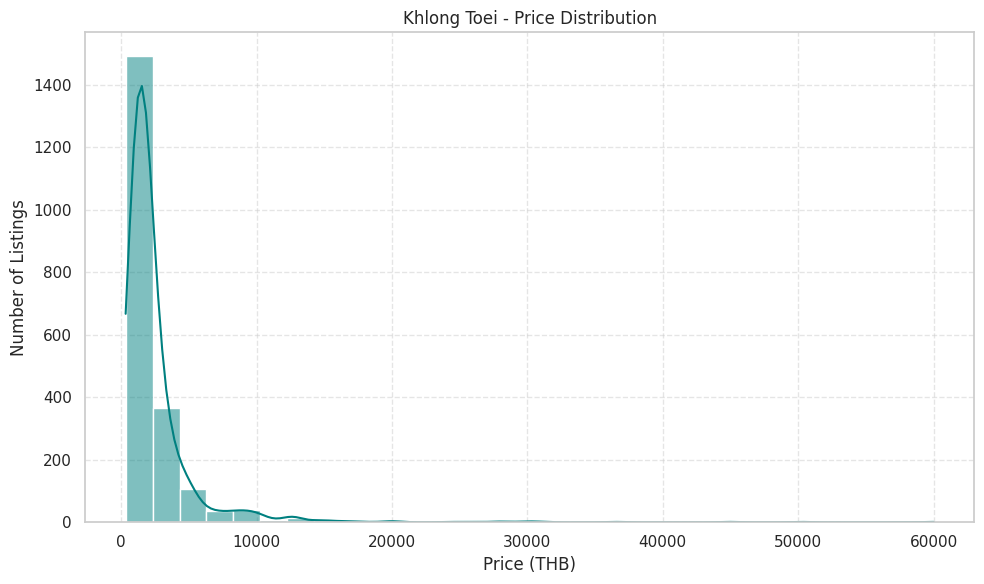

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df["neighbourhood"] == "Khlong Toei"], x="price", bins=30, kde=True, color="teal")
plt.title("Khlong Toei - Price Distribution")
plt.xlabel("Price (THB)")
plt.ylabel("Number of Listings")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

- Most listings are concentrated at lower price points, particularly around 0 to 10,000 THB.
-The distribution appears to be highly skewed to the left (negatively skewed), indicating that there are many low-priced options available.
-There is an opportunity to cater to budget-conscious travelers due to the abundance of lower-priced options.
-However, competition may be higher in this segment due to numerous affordable listings.

### Room Type

<ipython-input-110-83a6d65cb8f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kt_room, x="count", y="room_type", palette="pastel")


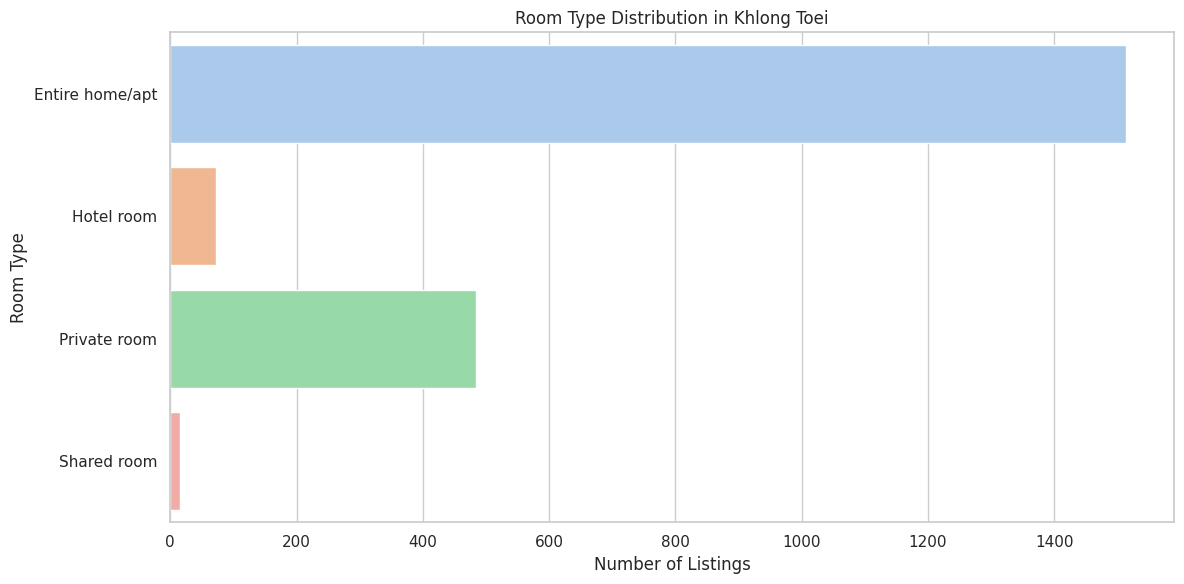

In [110]:
kt_room = (
    df[df["neighbourhood"] == "Khlong Toei"]
    .groupby("room_type")
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(12, 6))
sns.barplot(data=kt_room, x="count", y="room_type", palette="pastel")
plt.title("Room Type Distribution in Khlong Toei")
plt.xlabel("Number of Listings")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()

- The most significant portion of listings (over 1,400) falls under the category of "Entire home/apartment." This indicates that many hosts are offering complete units for rent, appealing to families or groups seeking privacy and space.
-The second largest category is "Private room," with several hundred listings (around 400). This suggests that there is also a substantial market for individual rooms within shared spaces, catering to travelers looking for more affordable options while still having some privacy.

- There is a clear opportunity in offering entire homes or apartments due to high demand.


In [111]:
kt_entire_home = df[
    (df["neighbourhood"] == "Khlong Toei") &
    (df["room_type"] == "Entire home/apt")
].copy()

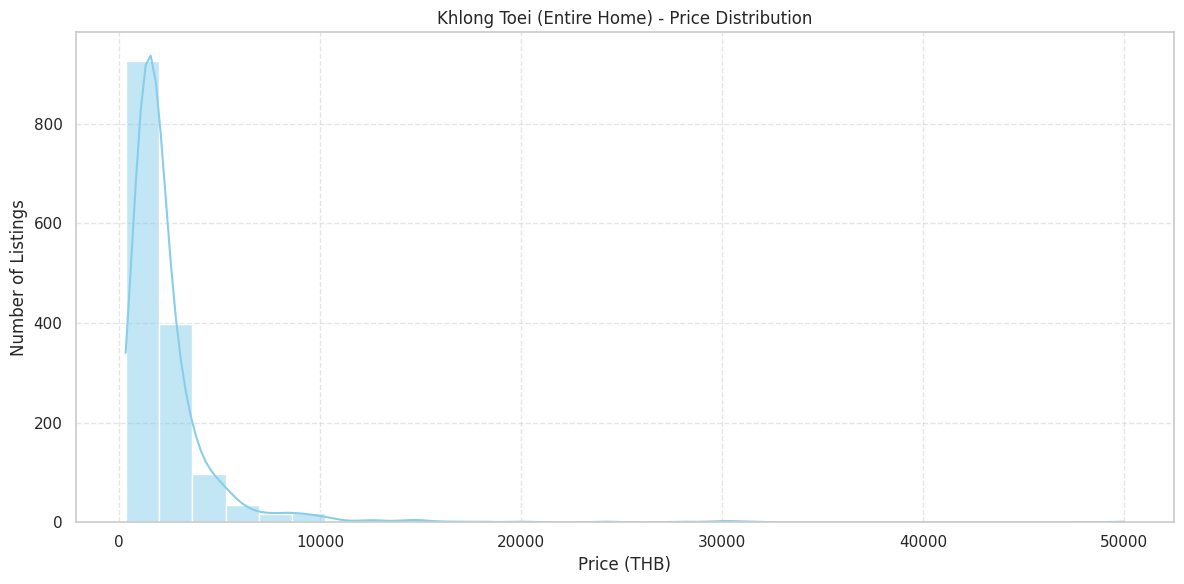

In [122]:
plt.figure(figsize=(12, 6))
sns.histplot(kt_entire_home["price"], bins=30, kde=True, color="skyblue")
plt.title("Khlong Toei (Entire Home) - Price Distribution")
plt.xlabel("Price (THB)")
plt.ylabel("Number of Listings")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

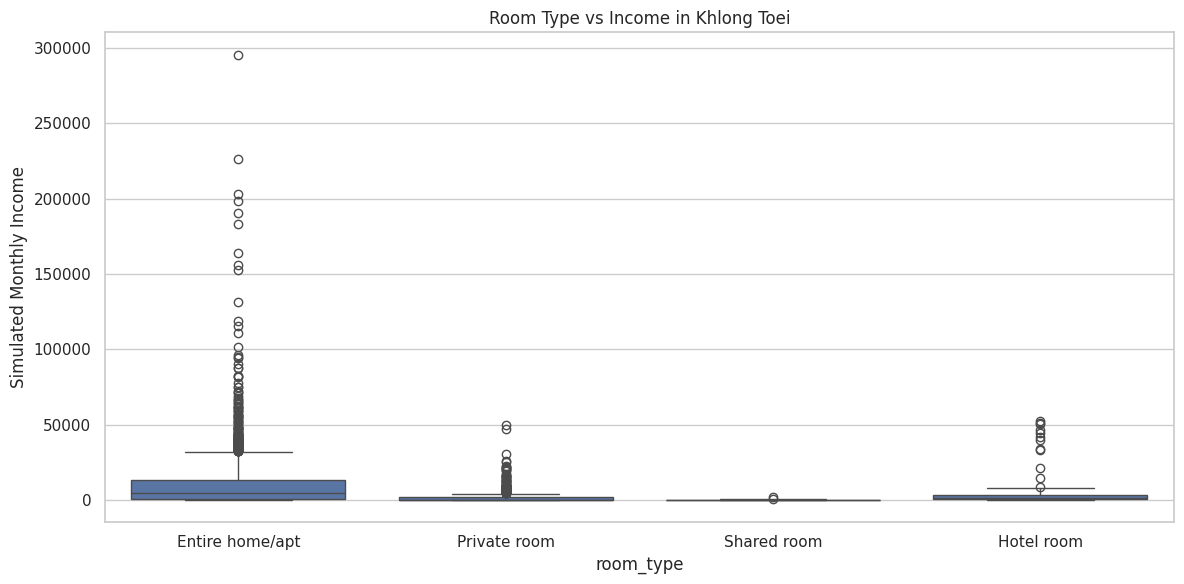

In [123]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["neighbourhood"] == "Khlong Toei"], x="room_type", y="simulated_monthly_income")
plt.title("Room Type vs Income in Khlong Toei")
plt.ylabel("Simulated Monthly Income")
plt.tight_layout()
plt.show()

In [113]:
kt_price_stats = kt_entire_home["price"].describe().round(2)
print(kt_price_stats)

count     1514.00
mean      2392.77
std       2750.39
min        332.00
25%       1212.00
50%       1732.00
75%       2512.00
max      50000.00
Name: price, dtype: float64


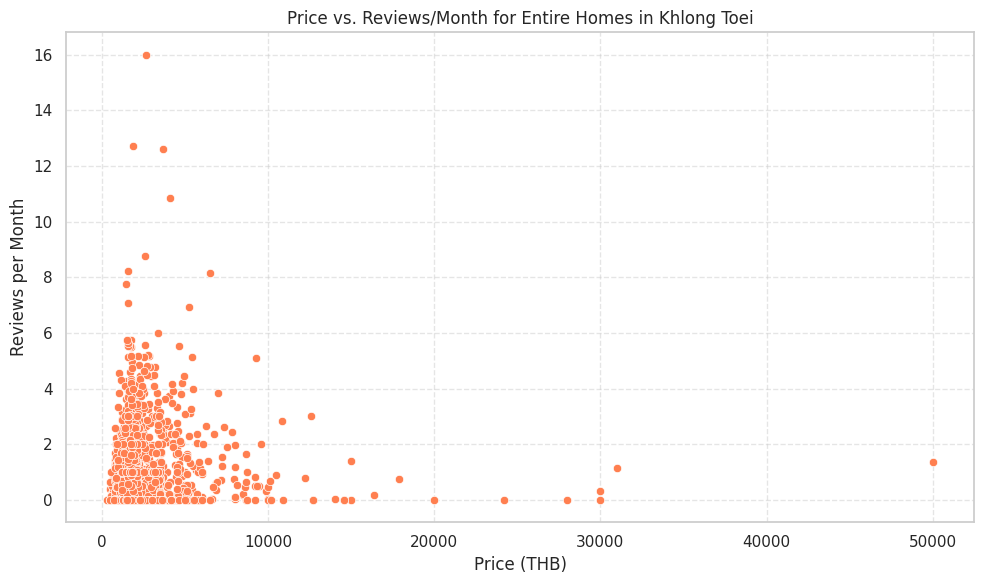

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kt_entire_home, x="price", y="reviews_per_month", color="coral")
plt.title("Price vs. Reviews/Month for Entire Homes in Khlong Toei")
plt.xlabel("Price (THB)")
plt.ylabel("Reviews per Month")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [115]:
top_income = (
    df[(df["neighbourhood"] == "Khlong Toei") & (df["room_type"] == "Entire home/apt")]
    .sort_values(by="simulated_monthly_income", ascending=False)
    .head(10)
    [["name", "price", "simulated_monthly_income", "reviews_per_month", "availability_365"]]
)

display(top_income)


name  price  \
3709   WalaVela FAMILYsuit/CITY CENTER/LOCAL THAI/Jac...  50000   
11850  Siamese Exclusive Queens-Twin 58 SQM/5min walk...   6492   
11851  Siamese Exclusive Queens-2BR 77 SQM/5 min walk...   9286   
14847  2BR-BTS Ekamai-100inch projector-Infinity Pool...   3676   
14894      2BR-BTS Ekamai 300m-Sky Infinity Pool&Gym-tub   4102   
15228         1BR- BTS Ekamai 300m-Sky infinity Pool&Gym   2668   
12324            2 BD - Luxury Thai Villa in Sukumvit 24  12614   
14761  Rare Large Corner & City View, 1 min Subway, Desk   5264   
10328    Private 11 Bedrooms lux Villa near Thonglor BTS  31000   
14770                  Luxury Living in Heart of Bangkok  10849   

       simulated_monthly_income  reviews_per_month  availability_365  
3709              295714.285714               1.38                87  
11850             226478.057143               8.14               365  
11851             202965.428571               5.10               362  
14847             198504.000000              12.60               323  
14894             190743.000000              10.85               346  
15228             182948.571429              16.00               154  
12324             163801.800000               3.03               363  
14761             156115.200000               6.92               123  
10328             152785.714286               1.15               299  
14770             131582.871429               2.83               249

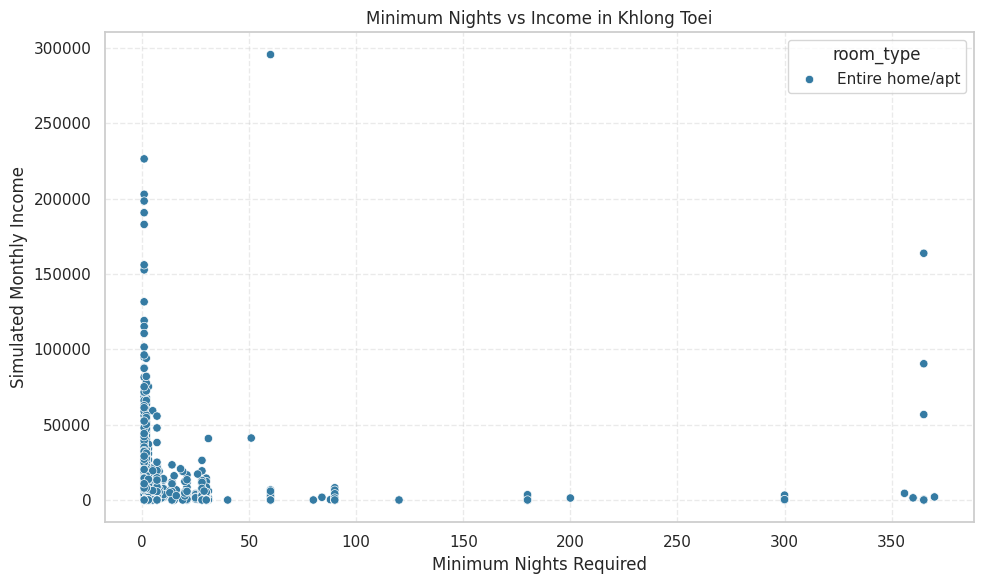

In [118]:
kt_map_data = df[(df["neighbourhood"] == "Khlong Toei") & (df["room_type"] == "Entire home/apt")]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=kt_map_data,
    x="minimum_nights",
    y="simulated_monthly_income",
    hue="room_type",
    palette="mako"
)
plt.title("Minimum Nights vs Income in Khlong Toei")
plt.xlabel("Minimum Nights Required")
plt.ylabel("Simulated Monthly Income")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Host Strategy

In [126]:
# Classify host type
kt_map_data["host_type"] = kt_map_data["calculated_host_listings_count"].apply(
    lambda x: "Business Host (4+)" if x >= 4 else "Individual Host (1–3)"
)

<ipython-input-126-3c00e2a14d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kt_map_data["host_type"] = kt_map_data["calculated_host_listings_count"].apply(


<ipython-input-128-cd8372a5cd51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kt_map_data, x="host_type", y="simulated_monthly_income", palette="Set2")


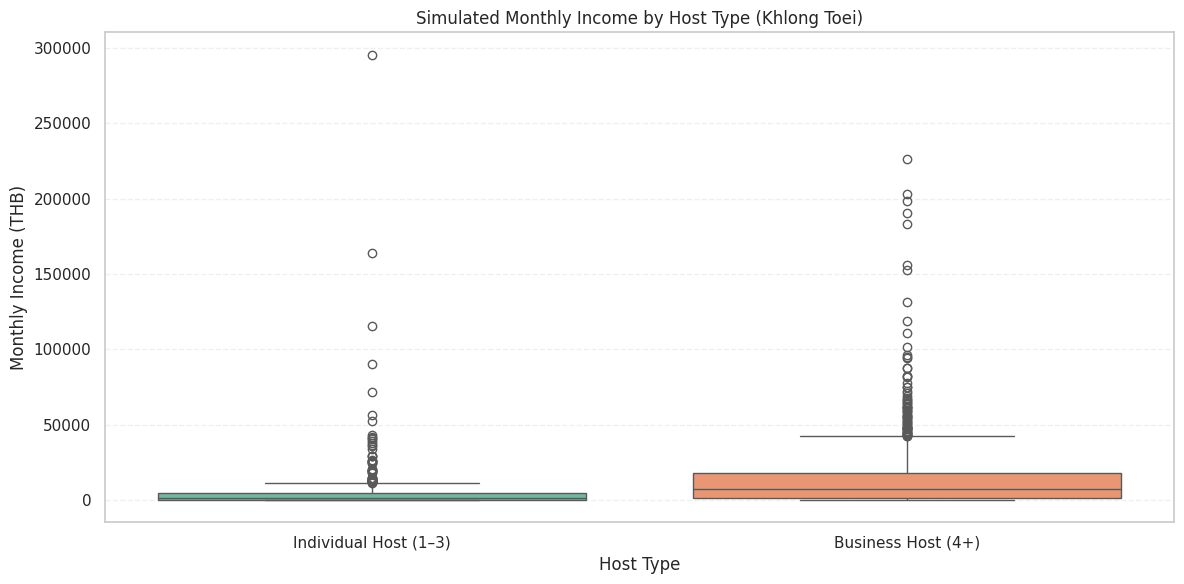

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=kt_map_data, x="host_type", y="simulated_monthly_income", palette="Set2")
plt.title("Simulated Monthly Income by Host Type (Khlong Toei)")
plt.xlabel("Host Type")
plt.ylabel("Monthly Income (THB)")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-129-2bcd52e48a3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kt_map_data, x="host_type", y="minimum_nights", palette="flare")


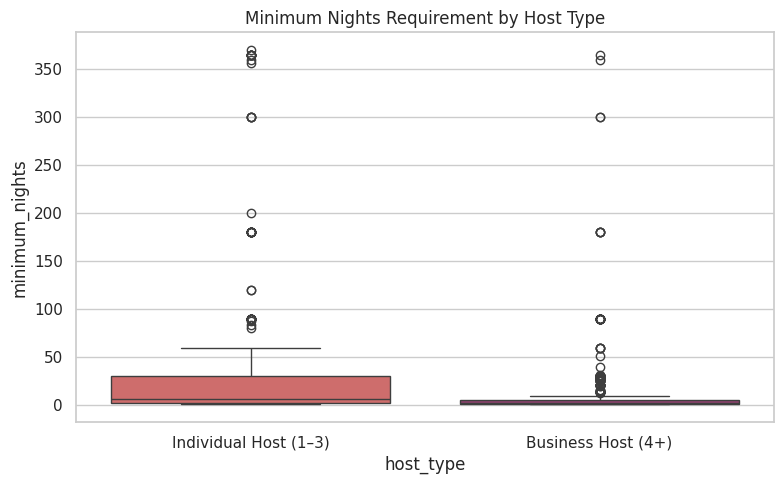

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=kt_map_data, x="host_type", y="minimum_nights", palette="flare")
plt.title("Minimum Nights Requirement by Host Type")
plt.tight_layout()
plt.show()

<ipython-input-130-b3fe3b91ca0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kt_map_data, x="host_type", y="price", palette="pastel")


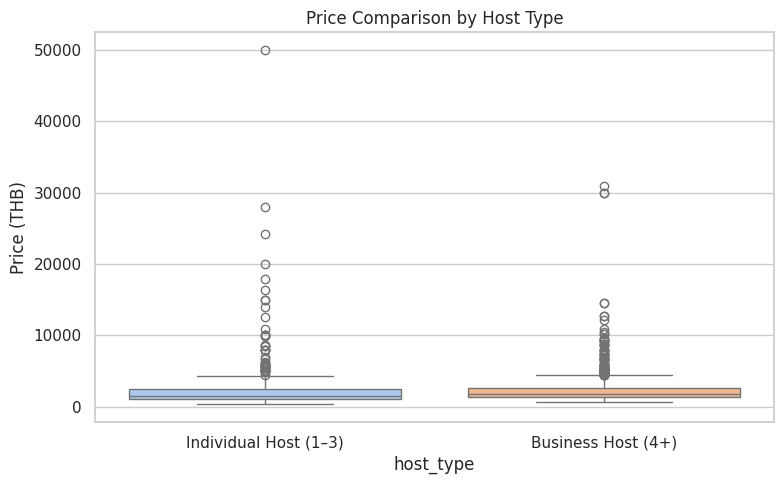

In [130]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=kt_map_data, x="host_type", y="price", palette="pastel")
plt.title("Price Comparison by Host Type")
plt.ylabel("Price (THB)")
plt.tight_layout()
plt.show()

In [137]:
individual_hosts = kt_map_data[kt_map_data["host_type"] == "Individual Host (1–3)"]
individual_hosts_under_10k = individual_hosts[individual_hosts["price"] < 10000]

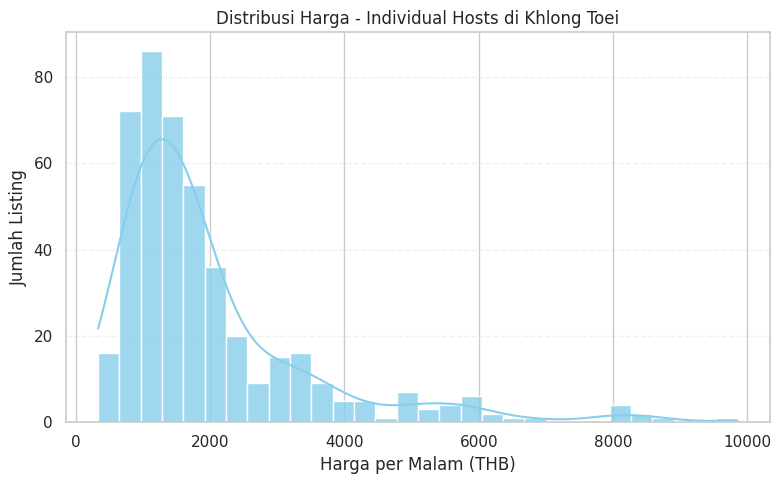

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(data=individual_hosts_under_10k, x="price", bins=30, kde=True, color="skyblue", alpha=0.8)
plt.title("Distribusi Harga - Individual Hosts di Khlong Toei")
plt.xlabel("Harga per Malam (THB)")
plt.ylabel("Jumlah Listing")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


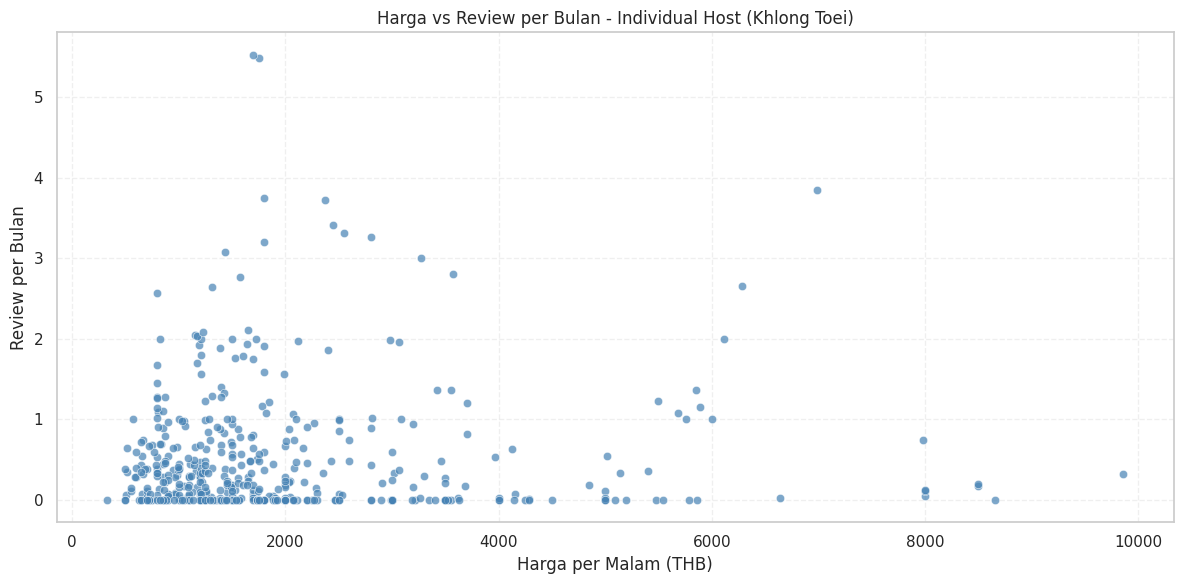

In [141]:
# Scatterplot harga vs review per bulan
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=individual_hosts_under_10k,
    x="price",
    y="reviews_per_month",
    color="steelblue",
    alpha=0.7
)
plt.title("Harga vs Review per Bulan - Individual Host (Khlong Toei)")
plt.xlabel("Harga per Malam (THB)")
plt.ylabel("Review per Bulan")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

##6. Kesimpulan dan Saran

Kesimpulan


---

- Sebagian besar listing Airbnb di Khlong Toei adalah "Seluruh rumah/apartemen," menunjukkan permintaan tinggi untuk akomodasi yang menawarkan privasi dan ruang.
- Harga listing untuk host individu umumnya lebih rendah, tetapi terdapat variasi signifikan dalam harga, terutama pada properti dengan pendapatan tinggi.
-Tipe host mempengaruhi jumlah malam minimum yang diperlukan; host individu sering kali menetapkan persyaratan malam minimum yang lebih fleksibel dibandingkan dengan host bisnis.
-Tidak ada korelasi kuat antara harga per malam dan jumlah ulasan per bulan; banyak listing dengan harga rendah mendapatkan sedikit ulasan, menunjukkan bahwa faktor lain mungkin mempengaruhi keputusan tamu untuk memberikan feedback.
-Ada peluang bagi pemilik properti untuk meningkatkan visibilitas dan pendapatan mereka melalui strategi penetapan harga yang kompetitif serta meningkatkan kualitas layanan agar dapat menarik lebih banyak tamu dan ulasan positif.


Saran Untuk Airbnb Host

---

- Mengingat tingginya permintaan untuk kategori ini, pertimbangkan untuk menawarkan lebih banyak listing "Seluruh rumah/apartemen" untuk menarik keluarga atau kelompok yang mencari privasi.

- Lakukan analisis harga secara berkala untuk memastikan bahwa tarif Anda kompetitif, terutama jika Anda adalah host individu. Pertimbangkan menggunakan strategi penetapan harga dinamis berdasarkan permintaan dan musim.

- Untuk meningkatkan jumlah ulasan per bulan, fokuslah pada pengalaman tamu yang luar biasa dan dorong mereka untuk meninggalkan review setelah menginap.

- Sesuaikan kebijakan malam minimum agar lebih fleksibel, terutama bagi host individu, agar dapat menarik lebih banyak tamu dengan berbagai kebutuhan.

- Lakukan analisis terhadap pesaing di area tersebut untuk memahami apa yang mereka tawarkan dan bagaimana Anda bisa membedakan diri dari mereka dalam hal layanan atau fasilitas.